# **Project Name**    - **Cardiovascular Risk Prediction**

---



---






### **Project Type**    - *Classification*
### **Contribution**    - *Individual* - *Ankur Bhatt*


# **Project Summary -**

The objective of this project was to utilize machine learning methods to predict the likelihood of coronary heart disease (CHD) in patients over a span of 10 years. The project utilized data from an ongoing cardiovascular study conducted in Framingham, Massachusetts, which provided information on more than 4,000 patients and included 15 attributes representing potential risk factors for CHD. These factors encompassed demographics, behavior, and medical aspects.

To ensure the data was suitable for analysis, extensive preprocessing was carried out. This involved addressing missing values using techniques such as median, mode, and K-nearest neighbors (KNN) imputation. Outliers were detected and eliminated using the Interquartile Range (IQR) method. Skewed continuous variables were transformed using  square root transformations to improve symmetry and enhance model performance.

Feature selection was performed by assessing the variance inflation factor to identify and remove multicollinearity. Additionally, a new feature called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. Redundant columns were eliminated to simplify the dataset. The most influential features for predicting CHD risk were identified as 'age,' 'sex', 'cigs_per_day,' 'bp_meds,' 'prevalent_stroke,' 'prevalent_hyp,' 'diabetes,' 'total_cholesterol,' 'bmi,' 'heart_rate,' 'glucose,' and 'pulse_pressure.'

To address the imbalanced nature of the dataset, the SMOTE combined with Tomek links undersampling technique was employed to balance the class distribution and enhance model performance. The data was standardized using the standard scalar method to ensure that all features were on a comparable scale.

Multiple machine learning models were evaluated based on their performance using recall as the primary evaluation metric. After thorough analysis, the Neural Network  was selected as the final prediction model due to its highest recall score among the models evaluated. Choosing a model with a high recall score aimed to accurately identify as many patients at risk of CHD as possible, even at the cost of some false positives.

In summary, this project showcased the potential of machine learning techniques in accurately predicting CHD risk in patients using data from a cardiovascular study. By meticulously preprocessing and transforming the data, selecting relevant features, and opting for an appropriate model based on its performance on a relevant evaluation metric, it was possible to make significant strides in accurately predicting CHD risk in patients, thus yielding a positive impact in the field.

# **GitHub Link -**

https://github.com/AnkurBhatt07/CardioVascular-Risk-Prediction.git

# **Problem Statement**


The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients' information. It includes over 4,000 records and 15 attributes. Each attribute is a potential risk factor. There are demographic, behavioral, and medical risk factors.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [60]:
# Import Libraries

import pandas as pd
import numpy as np
from datetime import datetime as dt


# Import Visualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.impute import KNNImputer
from sklearn.feature_selection import chi2

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

from sklearn.model_selection import train_test_split


from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import RepeatedStratifiedKFold


import xgboost as xgb

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Import warnings
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [61]:
df=pd.read_csv('data_cardiovascular_risk.csv')

### Dataset First View

In [62]:
# Dataset First Look
df.head()

id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    221.0  148.0   85.0    NaN       90.0     80.0   
1             1         0    212.0  168.0   98.0  29.77       72.0     75.0   
2             0         0    250.0  116.0   71.0  20.35       88.0     94.0   
3             1         0    233.0  158.0   88.0  28.26       68.0     94.0   
4             0         0    241.0  136.5   85.0  26.42       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0

In [63]:
df.drop('id',axis=1,inplace=True)

### Dataset Rows & Columns count

In [64]:
# Dataset Rows & Columns count
df.shape

(3390, 16)

### Dataset Information

In [65]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3390 non-null   int64  
 1   education        3303 non-null   float64
 2   sex              3390 non-null   object 
 3   is_smoking       3390 non-null   object 
 4   cigsPerDay       3368 non-null   float64
 5   BPMeds           3346 non-null   float64
 6   prevalentStroke  3390 non-null   int64  
 7   prevalentHyp     3390 non-null   int64  
 8   diabetes         3390 non-null   int64  
 9   totChol          3352 non-null   float64
 10  sysBP            3390 non-null   float64
 11  diaBP            3390 non-null   float64
 12  BMI              3376 non-null   float64
 13  heartRate        3389 non-null   float64
 14  glucose          3086 non-null   float64
 15  TenYearCHD       3390 non-null   int64  
dtypes: float64(9), int64(5), object(2)
memory usage: 423.9+ KB


#### Duplicate Values

In [66]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [67]:
# Missing Values/Null Values Count
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

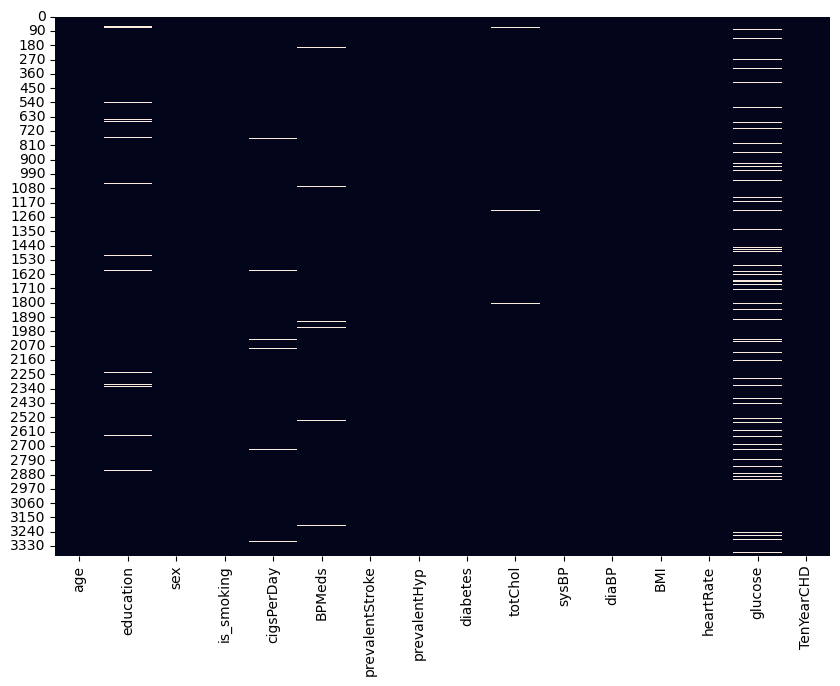

In [68]:
# Visualizing the missing values
plt.figure(figsize=(10,7))
sns.heatmap(df.isnull(),cbar=False)
plt.show()

### What did you know about your dataset?

1. The dataset consists of 3390 observations (rows) and 16 feature columns, with the "Ten Year CHD" column serving as the dependent variable. Each row represents a unique data point, and there are no duplicate rows in the dataset.

2. Several columns in the dataset contain missing values. The columns with missing values are education, cigs per day, BP meds, totChol, BMI, heart rate, and glucose. Missing values indicate that the corresponding information for those specific features is not available or was not recorded for some observations

## ***2. Understanding Your Variables***

In [69]:
# Dataset Columns
df.columns

Index(['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [70]:
# Dataset Describe
df.describe()

age    education   cigsPerDay       BPMeds  prevalentStroke  \
count  3390.000000  3303.000000  3368.000000  3346.000000      3390.000000   
mean     49.542183     1.970936     9.069477     0.029886         0.006490   
std       8.592878     1.019081    11.879078     0.170299         0.080309   
min      32.000000     1.000000     0.000000     0.000000         0.000000   
25%      42.000000     1.000000     0.000000     0.000000         0.000000   
50%      49.000000     2.000000     0.000000     0.000000         0.000000   
75%      56.000000     3.000000    20.000000     0.000000         0.000000   
max      70.000000     4.000000    70.000000     1.000000         1.000000   

       prevalentHyp     diabetes      totChol       sysBP        diaBP  \
count   3390.000000  3390.000000  3352.000000  3390.00000  3390.000000   
mean       0.315339     0.025664   237.074284   132.60118    82.883038   
std        0.464719     0.158153    45.247430    22.29203    12.023581   
min        0.000000     0.000000   107.000000    83.50000    48.000000   
25%        0.000000     0.000000   206.000000   117.00000    74.500000   
50%        0.000000     0.000000   234.000000   128.50000    82.000000   
75%        1.000000     0.000000   264.000000   144.00000    90.000000   
max        1.000000     1.000000   696.000000   295.00000   142.500000   

               BMI    heartRate      glucose   TenYearCHD  
count  3376.000000  3389.000000  3086.000000  3390.000000  
mean     25.794964    75.977279    82.086520     0.150737  
std       4.115449    11.971868    24.244753     0.357846  
min      15.960000    45.000000    40.000000     0.000000  
25%      23.020000    68.000000    71.000000     0.000000  
50%      25.380000    75.000000    78.000000     0.000000  
75%      28.040000    83.000000    87.000000     0.000000  
max      56.800000   143.000000   394.000000     1.000000

### Variables Description

**Demographic:**
* Sex: male or female ("M" or "F")
* Age: Age of the patient (Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
* Education: The level of education of the patient (categorical values - 1,2,3,4)

**Behavioral:**
* is_smoking: whether or not the patient is a current smoker ("YES" or "NO")
* Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

**Medical (history):**
* BP Meds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
* Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
* Diabetes: whether or not the patient had diabetes (Nominal)

**Medical (current):**
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
* Glucose: glucose level (Continuous)

**Predict variable (desired target):**
* 10-year risk of coronary heart disease CHD(binary: “1” means “Yes”, “0” means “No”)

### Check Unique Values for each variable.

In [71]:
# Check Unique Values for each variable.
for i,column in enumerate(df.columns):
  print(f'{i+1})  {column} : number of unique values= {df[column].nunique()}')
  print(f'unique values: {df[column].unique() }')
  print('\n')

1)  age : number of unique values= 39
unique values: [64 36 46 50 61 41 55 53 43 44 58 51 56 42 38 63 35 54 62 47 34 39 59 45
 49 60 40 52 48 37 65 57 68 67 33 66 69 70 32]


2)  education : number of unique values= 4
unique values: [ 2.  4.  1.  3. nan]


3)  sex : number of unique values= 2
unique values: ['F' 'M']


4)  is_smoking : number of unique values= 2
unique values: ['YES' 'NO']


5)  cigsPerDay : number of unique values= 32
unique values: [ 3.  0. 10. 20. 30. 35. 40. 15.  9. 60. 17. 25.  5. 43.  7. 50. 19. 18.
  1. 45.  2.  6. nan 11.  8.  4. 14. 16. 23. 13. 12. 70. 38.]


6)  BPMeds : number of unique values= 2
unique values: [ 0. nan  1.]


7)  prevalentStroke : number of unique values= 2
unique values: [0 1]


8)  prevalentHyp : number of unique values= 2
unique values: [0 1]


9)  diabetes : number of unique values= 2
unique values: [0 1]


10)  totChol : number of unique values= 240
unique values: [221. 212. 250. 233. 241. 272. 238. 295. 220. 326.  nan 210. 213. 227.
 

## 3. ***Data Wrangling***

### Data Wrangling Code

In [72]:
# Before doing any data wrangling lets create copy of the dataset
df_2 = df.copy()

In [73]:
# Renaming the columns
df_2.rename(columns={'cigsPerDay':'cigs_per_day','BPMeds':'bp_meds',
                   'prevalentStroke':'prevalent_stroke','prevalentHyp':'prevalent_hyp',
                   'totChol':'total_cholesterol','sysBP':'systolic_bp','diaBP':'diastolic_bp',
                   'BMI':'bmi','heartRate':'heart_rate','TenYearCHD':'ten_year_chd'},
          inplace = True)

In [74]:
dependent_var = ['ten_year_chd']
categorical_var = [i for i in df_2.columns if df_2[i].nunique()<5]
numerical_var = [i for i in df_2.columns if i not in categorical_var]

In [75]:
print('dependent_var:',dependent_var,'\n','categorical_var:',categorical_var,'\n','numerical_var:',numerical_var)

dependent_var: ['ten_year_chd'] 
 categorical_var: ['education', 'sex', 'is_smoking', 'bp_meds', 'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'ten_year_chd'] 
 numerical_var: ['age', 'cigs_per_day', 'total_cholesterol', 'systolic_bp', 'diastolic_bp', 'bmi', 'heart_rate', 'glucose']


### What all manipulations have you done and insights you found?

1. Changed the names of all the columns for ease of use.
2. Defined dependent,categorical and numerical variables for further analysis.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

0    2879
1     511
Name: ten_year_chd, dtype: int64


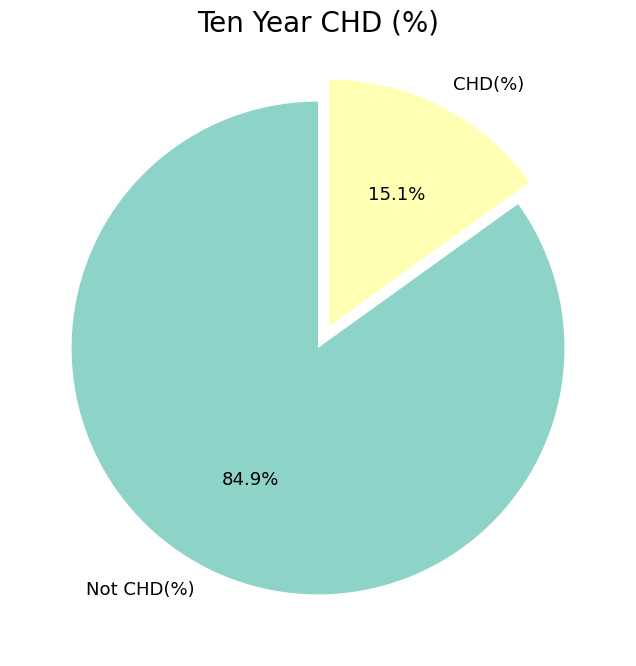

In [76]:
# Chart - 1 visualization code
# Distribution of dependent variable:  'ten_year_chd'
print(df_2['ten_year_chd'].value_counts())

plt.figure(figsize=(12,8))
colors = sns.color_palette("Set3")
explode = [0,0.1]
textprops = {'fontsize':13}
plt.pie(df_2['ten_year_chd'].value_counts(), labels=['Not CHD(%)','CHD(%)'], startangle=90, colors=colors, explode = explode, autopct="%1.1f%%",textprops = textprops)
plt.title('Ten Year CHD (%)', fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

Pie charts are effective in illustrating proportions within a whole. They are particularly helpful for visualizing data presented as percentages. These charts provide a clear representation of how different components contribute to the overall composition of a dataset.

##### 2. What is/are the insight(s) found from the chart?

From the above chart it is clear that 15.1% that is 511 out of 3390 have coronary heart disease(CHD) while rest of 84.9% that is 2879 out of 3390 donot have coronary heart disease (CHD).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight regarding the prevalence of coronary heart disease (CHD) can potentially create a positive business impact. It provides an understanding of the proportion of individuals affected by CHD within the dataset. This information can aid businesses in developing targeted products, services, or interventions related to heart health, leading to improved customer satisfaction, better health outcomes, and potentially new business opportunities in the healthcare industry.

#### Chart - 2

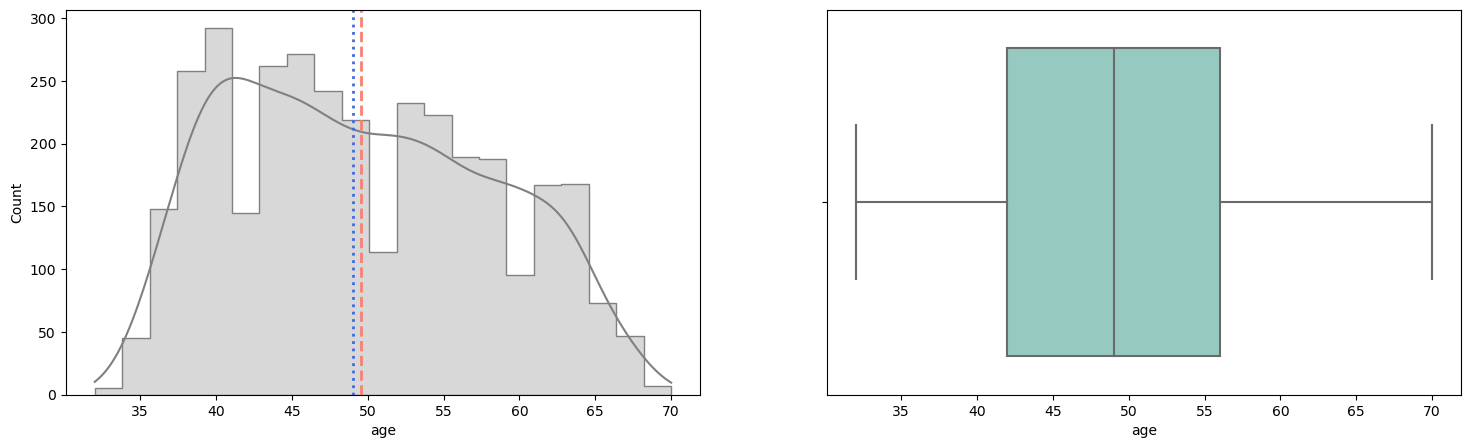

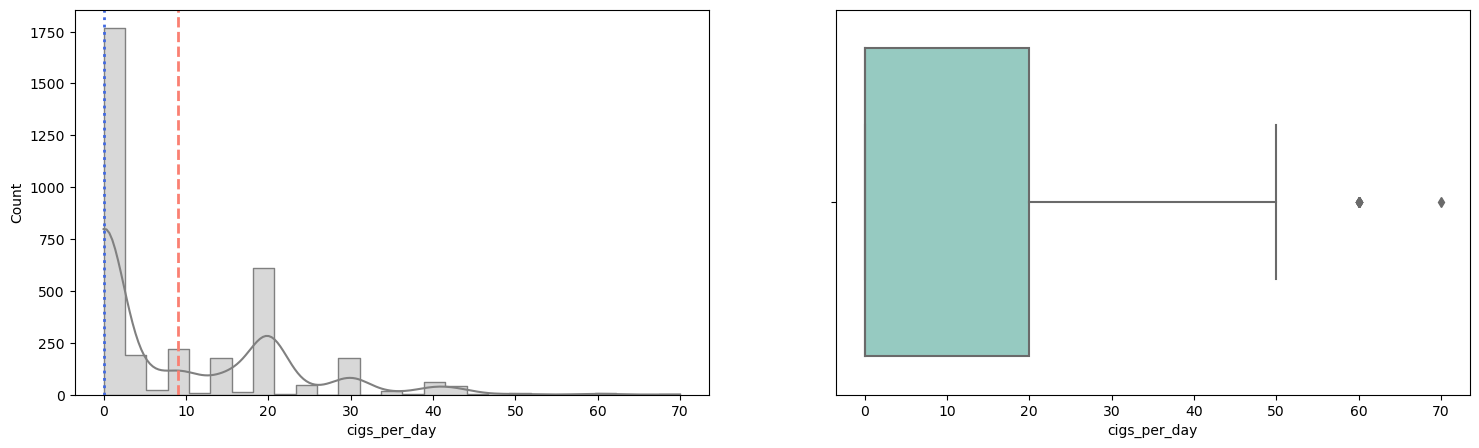

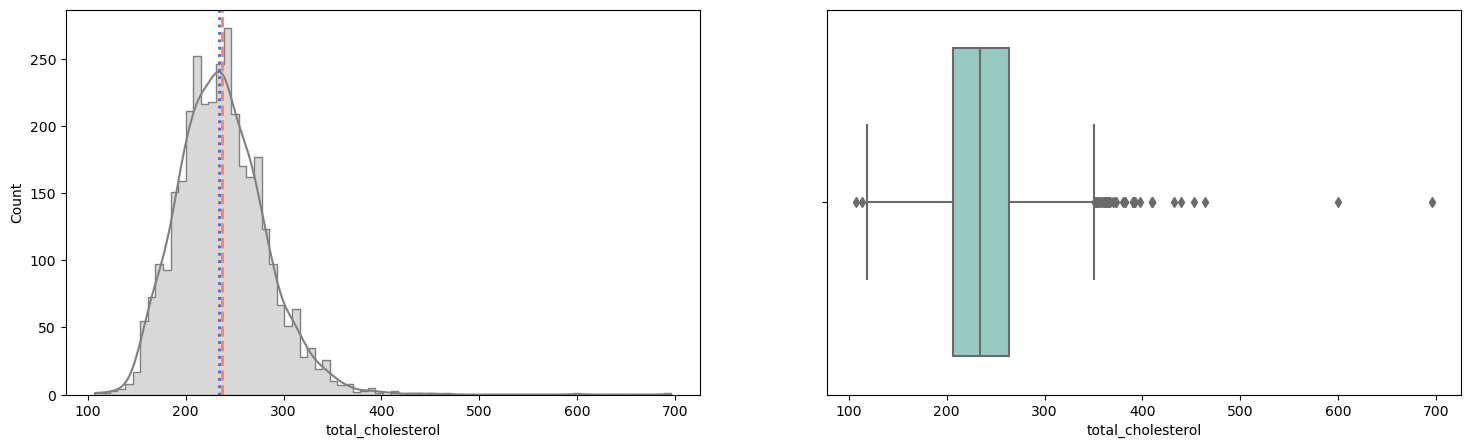

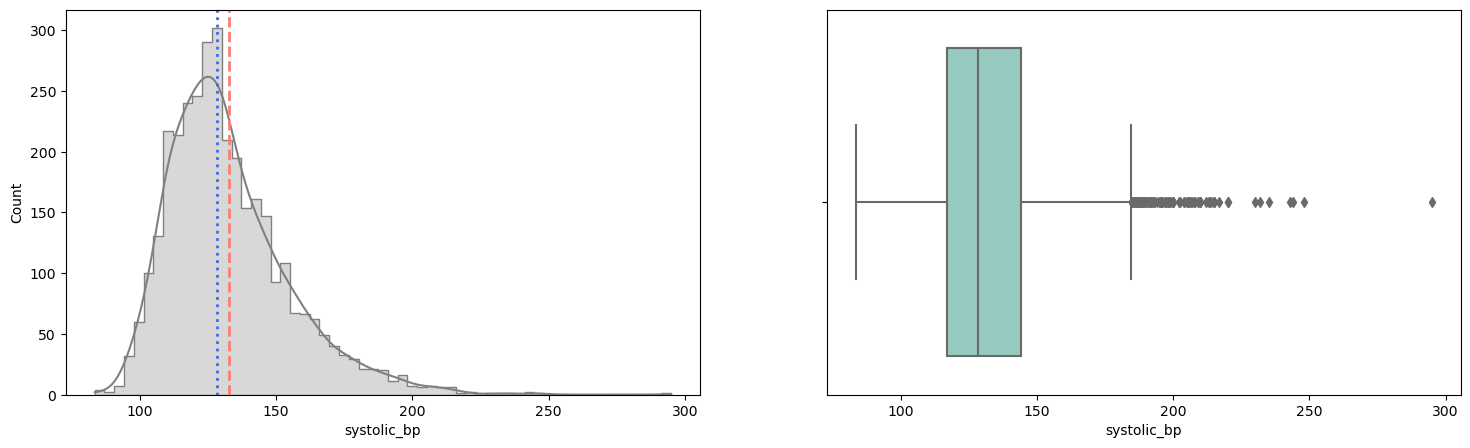

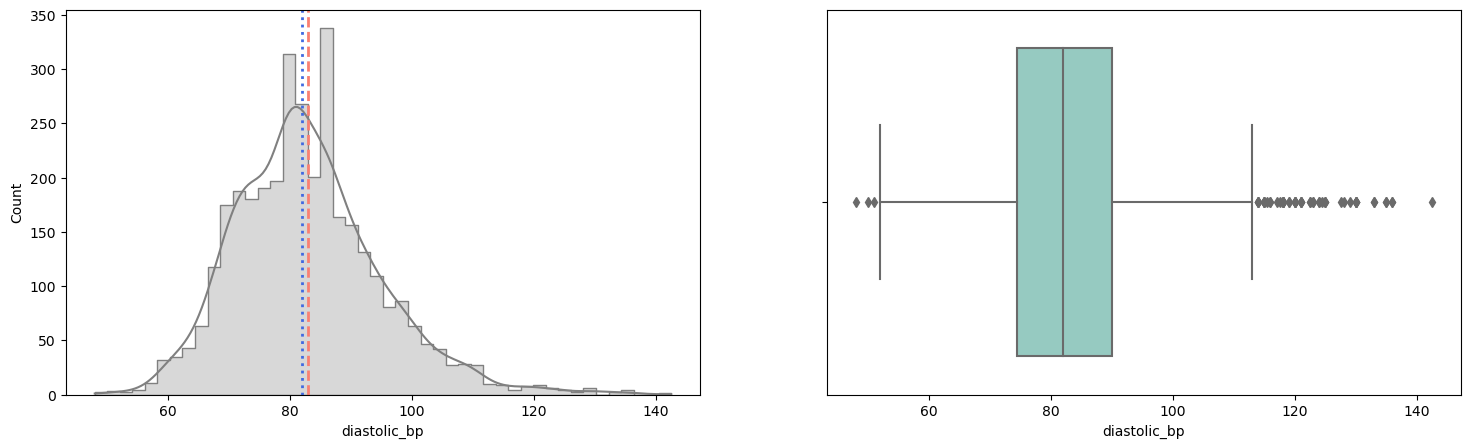

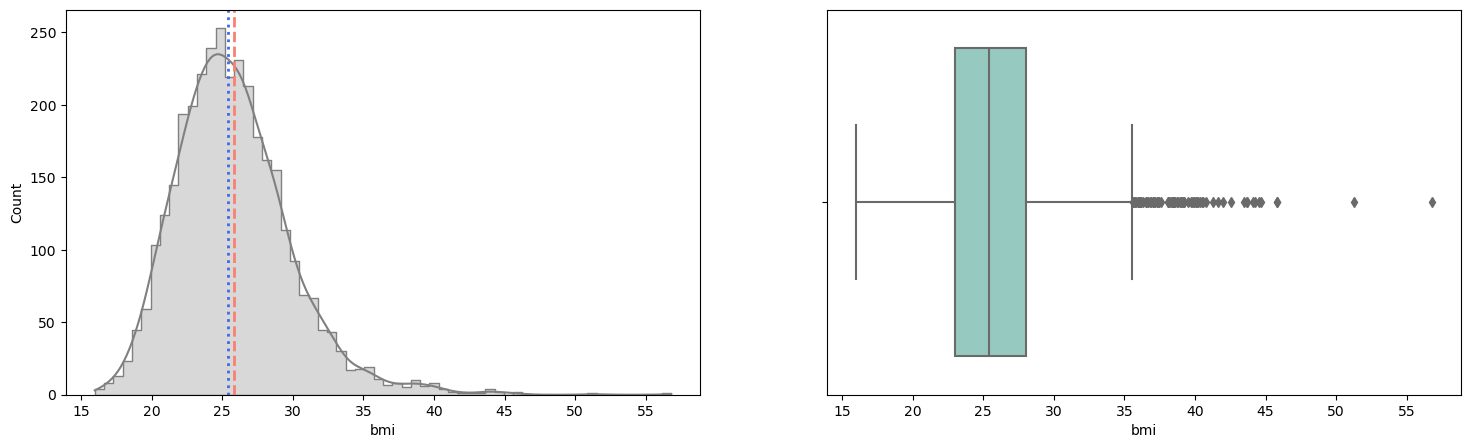

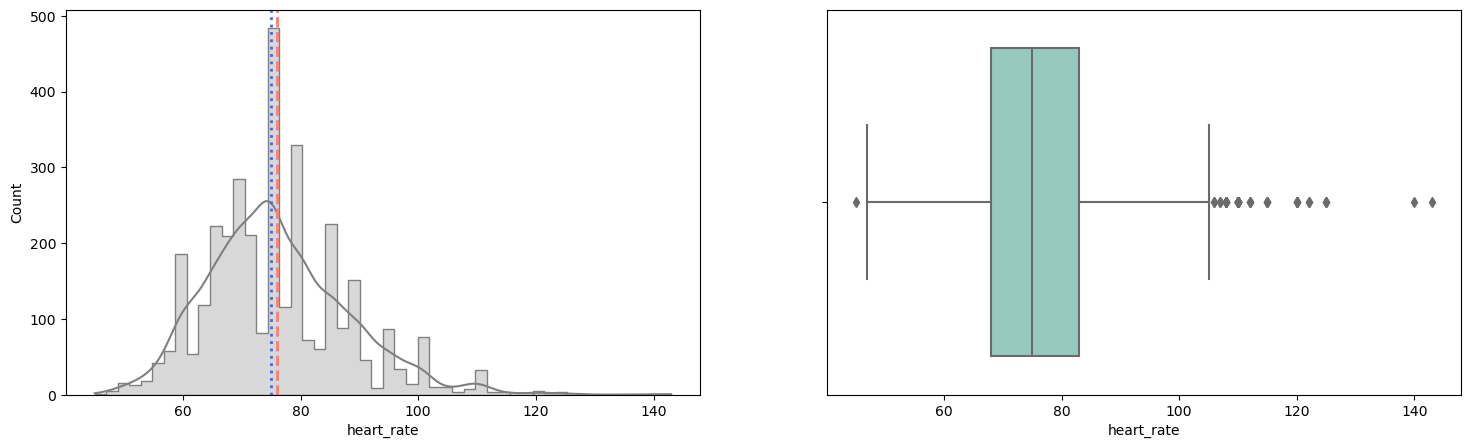

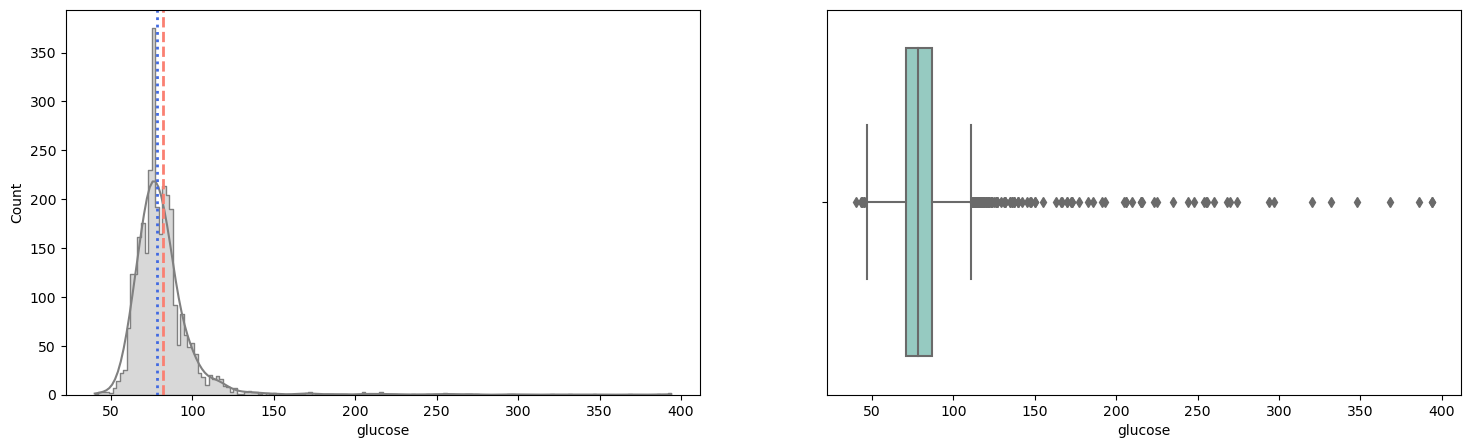

In [77]:
# Chart - 2 visualization code
# Distribution of Numerical Features
for var in numerical_var:
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,5))
  sns.histplot(df_2,x=var,kde=True,ax=ax1,element='step',color='grey',alpha=0.3)
  ax1.axvline(df_2[var].mean(),color='salmon', linestyle='dashed', linewidth=2)
  ax1.axvline(df_2[var].median(),color='royalblue', linestyle=':', linewidth=2)
  sns.boxplot(data = df_2,x=var,ax=ax2,palette="Set3")
  plt.show()
  print('\n\n')

##### 1. Why did you pick the specific chart?

I used a histogram plot to analyze the variable distributions in the dataset and determine whether they are symmetric. Histograms are effective for visualizing data distribution and identifying patterns or outliers, especially for large datasets.

Additionally, I utilized box plots to summarize key statistical characteristics, such as the median, quartiles, range, and outliers, for each numerical variable in the dataset. Box plots help in comparing multiple datasets, understanding data dispersion, and identifying outliers within the interquartile range, including mean, median, maximum, and minimum values.

##### 2. What is/are the insight(s) found from the chart?

Upon analyzing the distributions of the numerical features, it can be observed that most of them exhibit a close approximation to a normal distribution, albeit with some degree of skewness. However, it is worth noting that outliers are present in all numerical features, except for the "age" column. These outliers will be addressed before proceeding with model building.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights from analyzing the distributions and identifying outliers in the numerical features can indeed have a positive business impact. By understanding the distribution characteristics of the variables and addressing outliers, it becomes possible to make more accurate predictions and informed decisions. This can lead to improved business strategies, optimized resource allocation, better risk management, and enhanced overall performance. Additionally, handling outliers before model building can result in more robust and reliable predictive models, further contributing to positive business outcomes.

#### Chart - 3

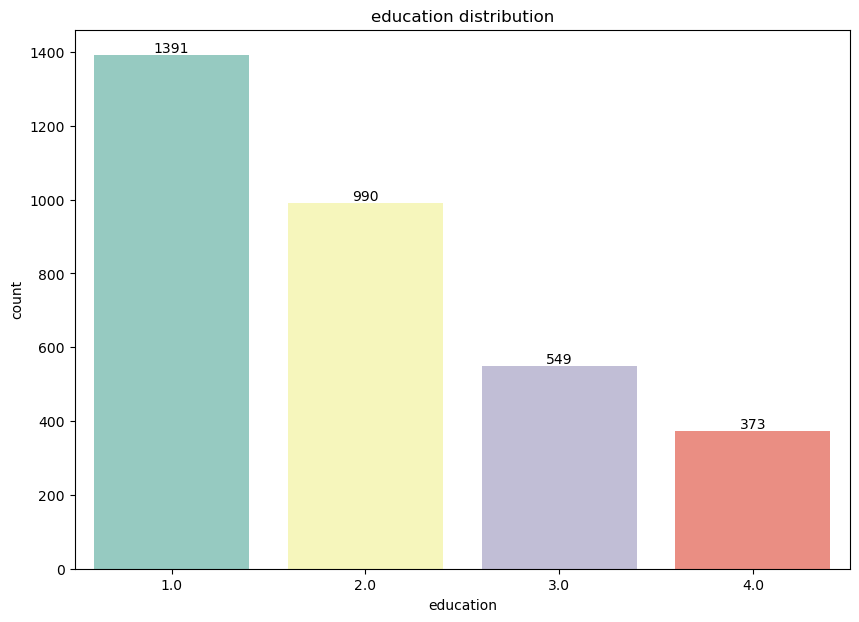

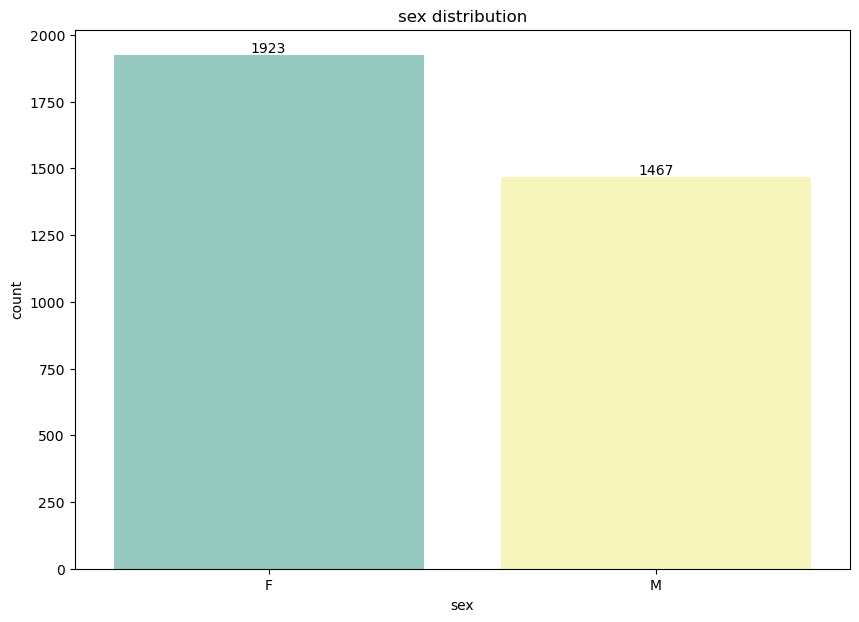

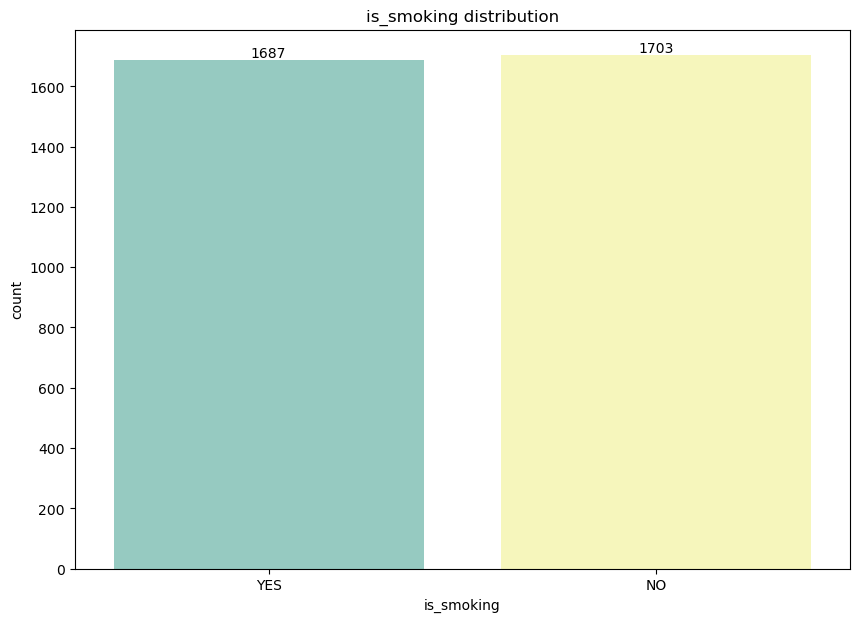

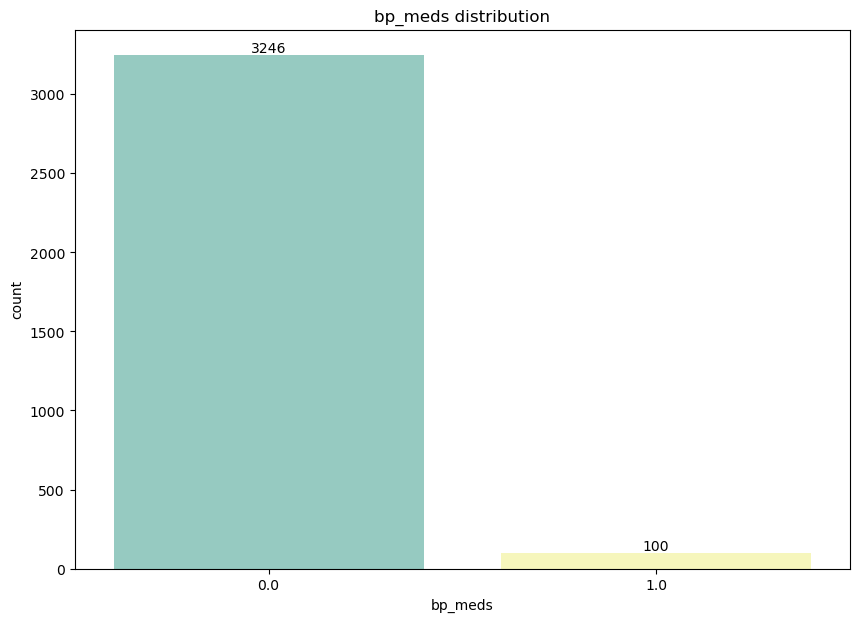

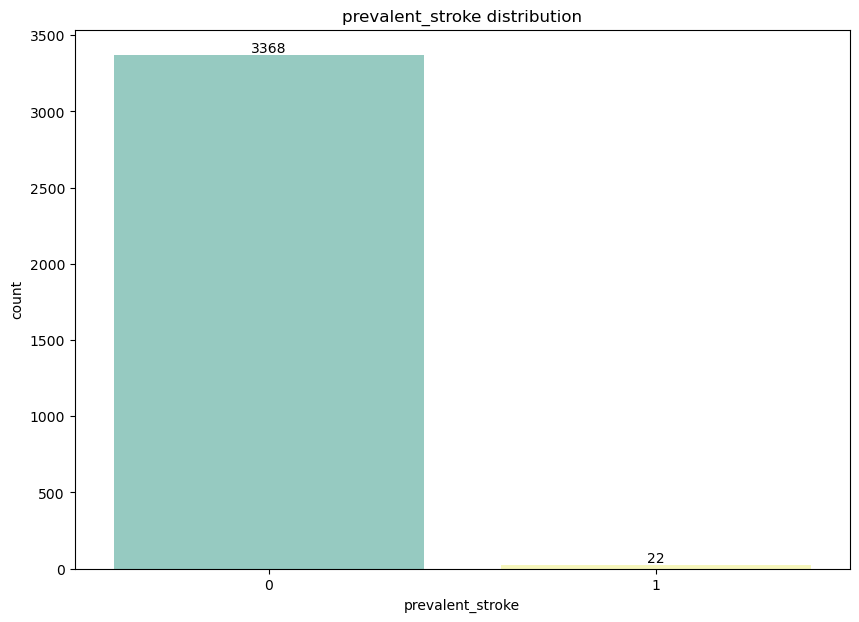

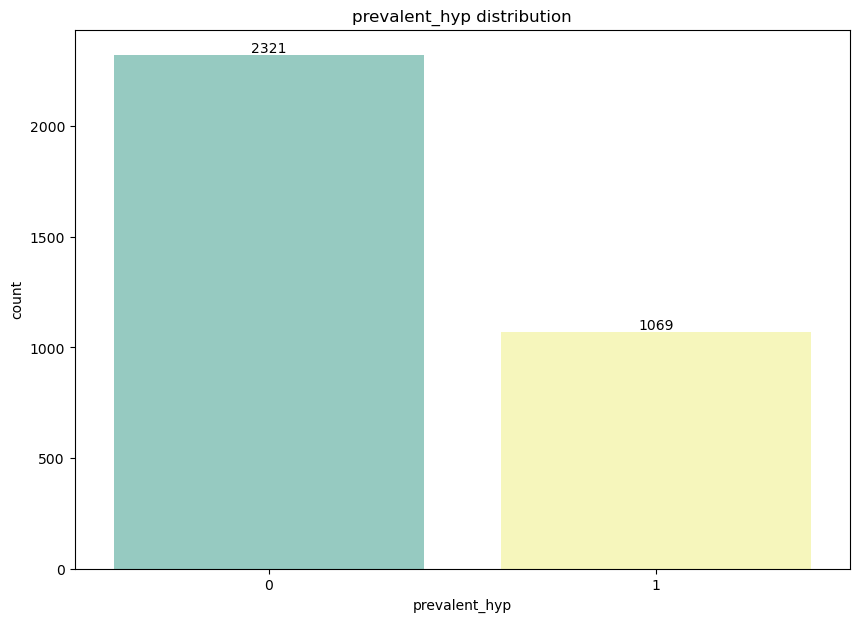

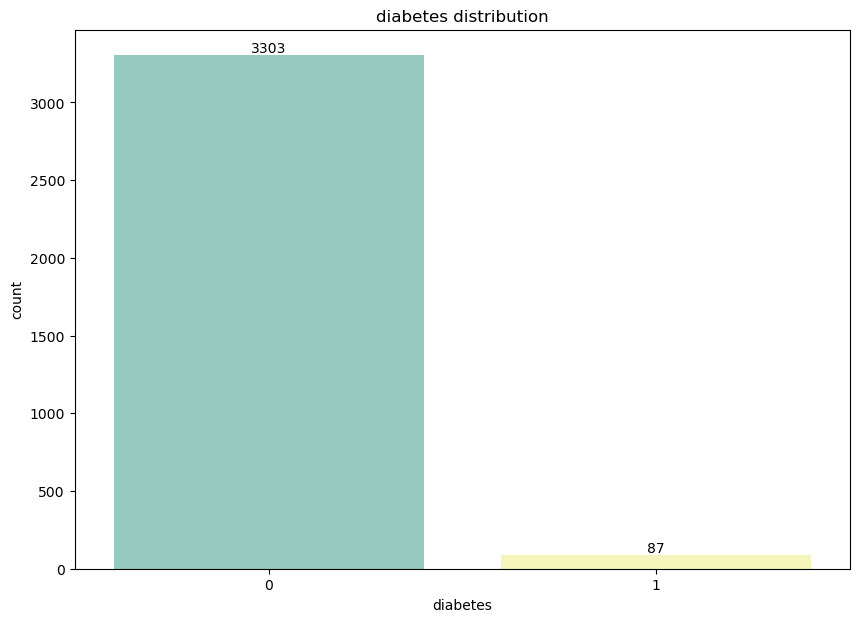

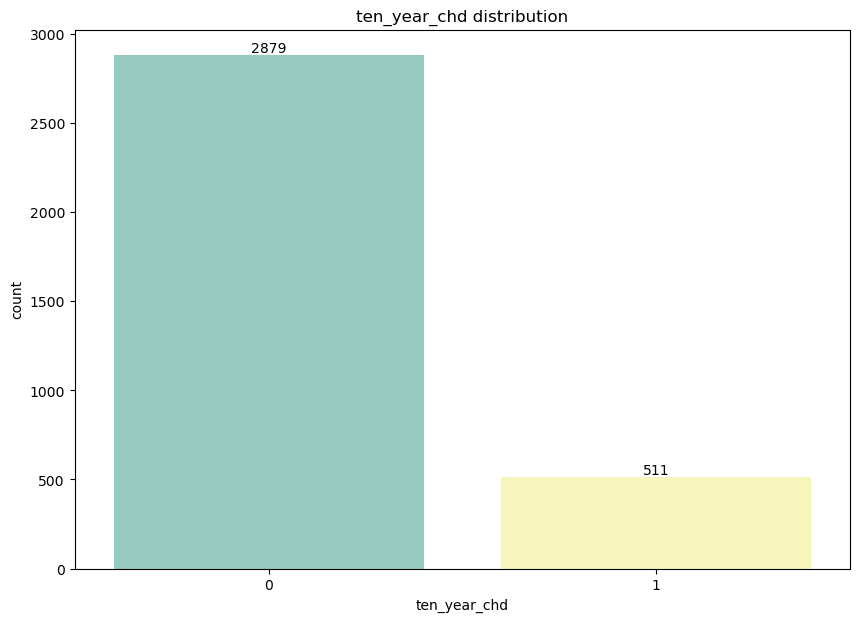

In [78]:
# Chart - 3 visualization code
# Analysing the distribution of categorical variables in the dataset
for i in categorical_var:
  plt.figure(figsize=(10,7))
  ax=sns.countplot(x=i,data=df_2,palette="Set3")
  for label in ax.containers:
    ax.bar_label(label)
  plt.xlabel(i)
  plt.title(i+' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Bar charts serve the purpose of comparing the sizes or frequencies of various categories or groups of data. They are particularly valuable when it comes to comparing data across different categories, enabling effective visualization of substantial amounts of information within a confined space.

##### 2. What is/are the insight(s) found from the chart?

In the education column, the highest count is observed for category 1, followed by categories 2, 3, and 4.

The distribution of gender is uneven, with a higher count for females compared to males. However, the distribution in the is_smoking column appears to be even.

On the other hand, the columns for bp_meds, prevalent_stroke, prevalent_hyp, and diabetes display an imbalance, with a limited number of positive cases.

Lastly, the ten_year_chd column also exhibits an imbalance, with a relatively small number of positive cases compared to the negative cases.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. Understanding the distribution of categories in various columns helps identify patterns and target specific demographics or areas of focus. For example, businesses can develop tailored marketing campaigns based on the gender distribution or design educational programs based on the education levels of the target audience. Additionally, recognizing the imbalanced distribution of health conditions can guide businesses in developing specialized treatments or preventive measures to address specific needs.

However, it is important to note that the chart alone does not provide a complete picture of the business impact. The actual impact would depend on how well these insights are utilized in business strategies and actions. Factors such as market demand, competition, and the effectiveness of the implemented strategies would also play a role in determining the overall business growth. Therefore, while the gained insights have the potential to create positive business impact, their actual realization would require further analysis and strategic implementation.

#### Chart - 4

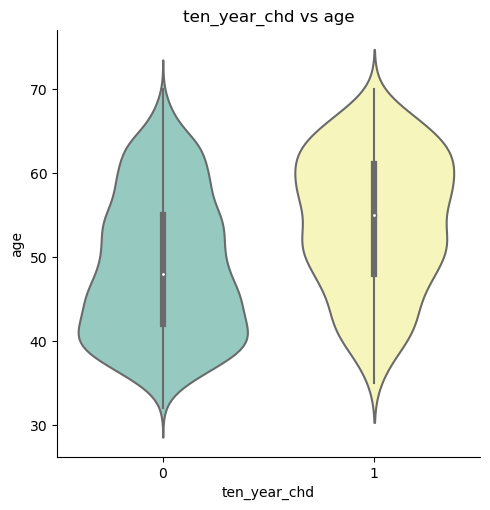

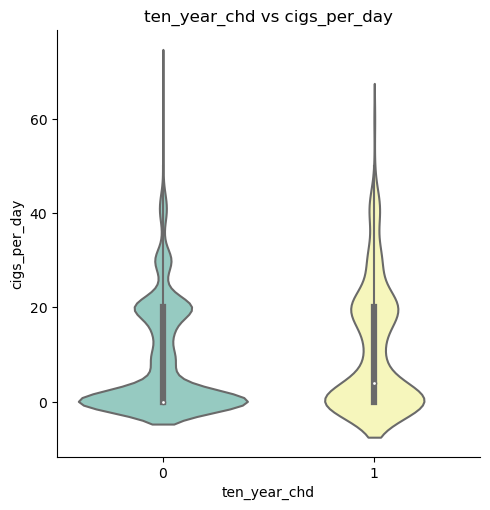

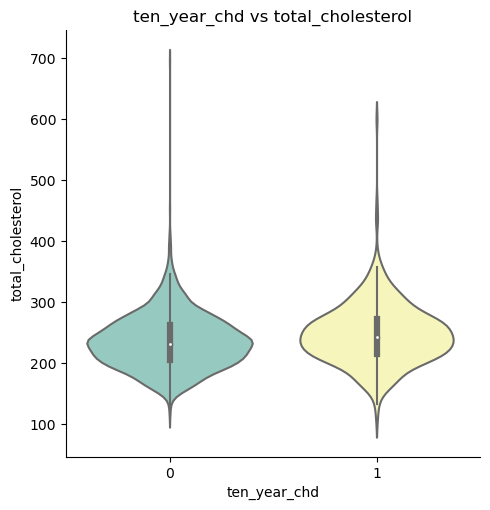

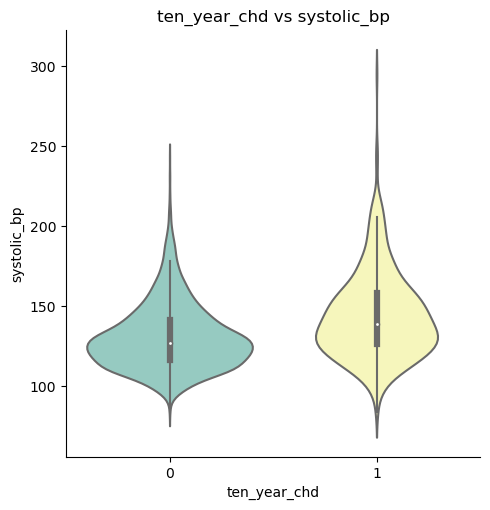

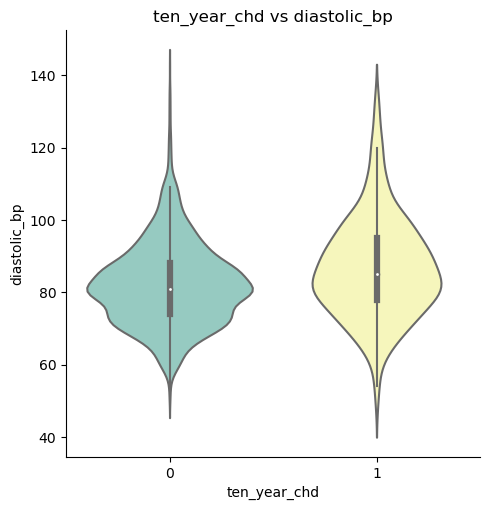

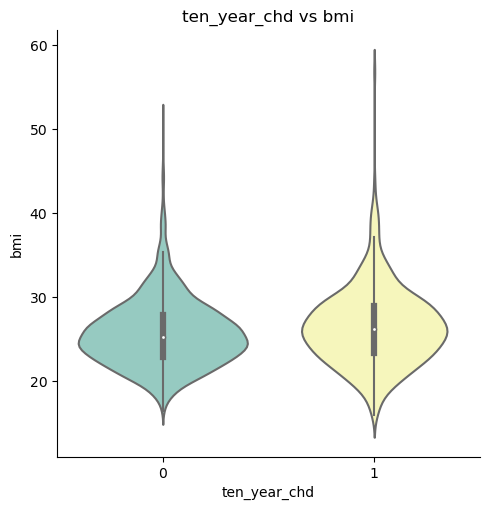

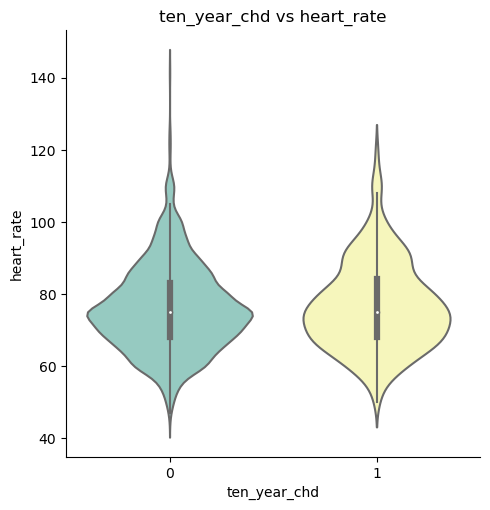

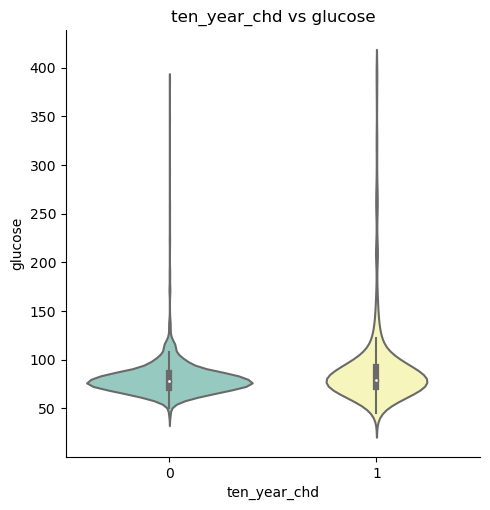

In [79]:
# Chart - 4 visualization code
# Relationship between the dependent variable and numerical features
for i in numerical_var:
  sns.catplot(x=dependent_var[0],y=i,data=df_2,kind='violin',palette='Set3')
  plt.ylabel(i)
  plt.xlabel(dependent_var[0])
  plt.title(dependent_var[0]+' vs '+i)
  plt.show()

##### 1. Why did you pick the specific chart?

The violin chart is a type of data visualization that combines aspects of a box plot and a kernel density plot. It is used to display the distribution and density of data across different categories or groups. Some features of the violin chart include:

Shape and width: The shape of the violin represents the data distribution, typically displaying a mirrored, symmetrical shape. The width of the violin at different points indicates the density of data.

Quartiles and median: The central "box" in the violin chart represents the interquartile range (IQR) and contains the median value. This provides insights into the spread and central tendency of the data.

Grouping and comparison: Violin charts can be grouped or arranged side by side to compare distributions across different categories or groups. This allows for visual comparisons of data distribution shapes, spreads, and densities.

##### 2. What is/are the insight(s) found from the chart?

When comparing age and ten_year_chd, it is evident that the density of positive cases is significantly higher among older individuals, suggesting a higher occurrence of the condition in the elderly.

In the case of cigs_per_day, non-smokers exhibit a greater number of negative cases, whereas the positive cases are relatively fewer among non-smokers.

Analyzing ten_year_chd and glucose, the density of negative cases surpasses that of positive cases for similar glucose values, indicating a higher prevalence of negative cases within the given glucose range.

However, the remaining charts do not offer substantial insights or noteworthy patterns in the data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from analyzing the relationships between age and ten_year_chd, cigs_per_day and ten_year_chd, and glucose and ten_year_chd can potentially lead to positive business impacts. Tailoring healthcare services and marketing campaigns to the elderly population, promoting smoking cessation programs for non-smokers, and providing targeted interventions for individuals within specific glucose ranges can improve health outcomes and customer satisfaction. These insights enable businesses to develop more effective preventive measures, enhance risk assessment strategies, and provide personalized healthcare solutions. By leveraging these insights, businesses can contribute to improved public health, customer engagement, and overall business success.

#### Chart - 5

<Figure size 1000x500 with 0 Axes>

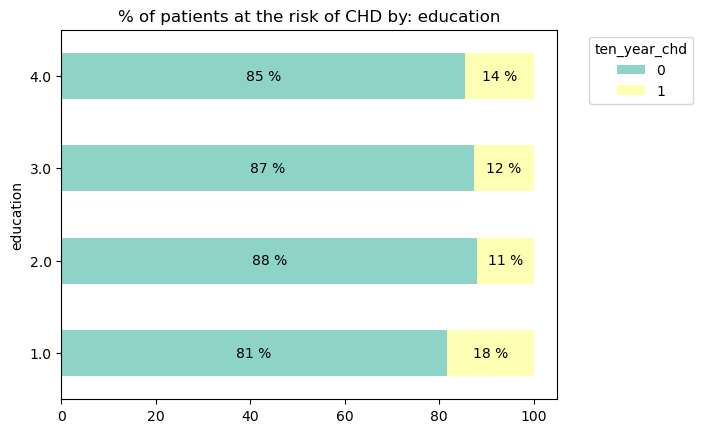

<Figure size 1000x500 with 0 Axes>

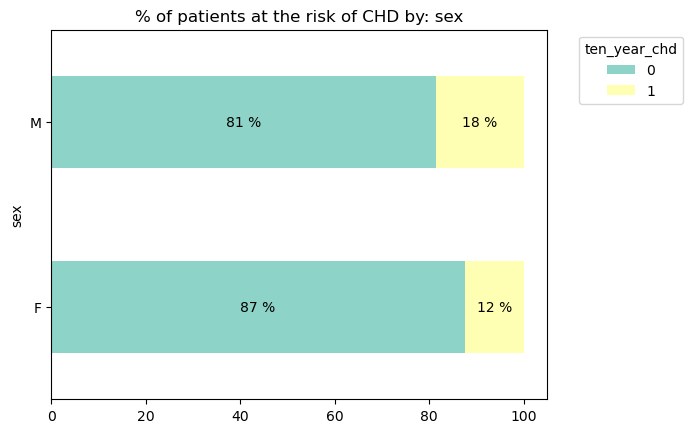

<Figure size 1000x500 with 0 Axes>

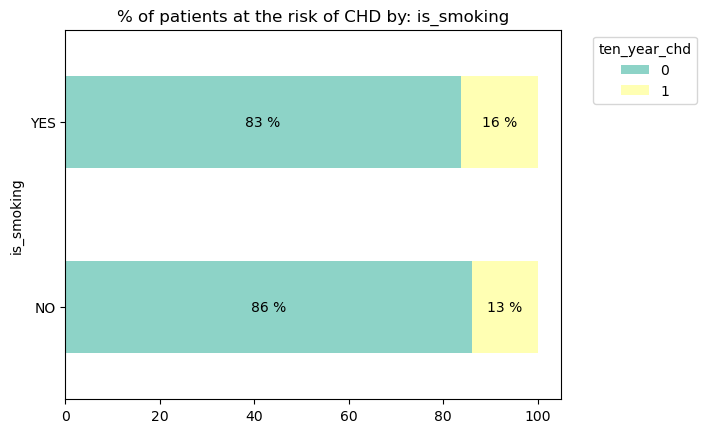

<Figure size 1000x500 with 0 Axes>

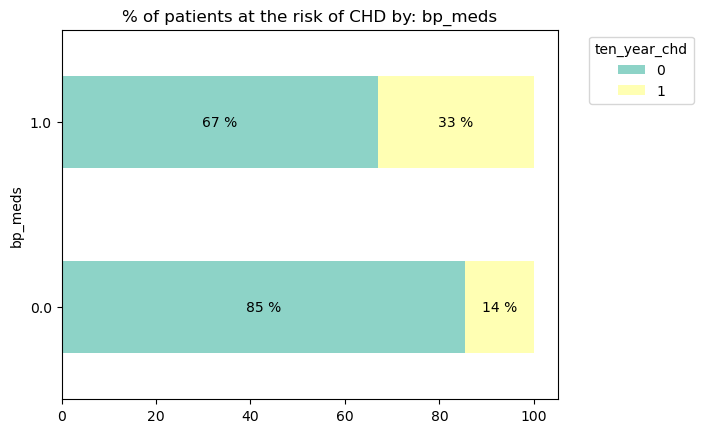

<Figure size 1000x500 with 0 Axes>

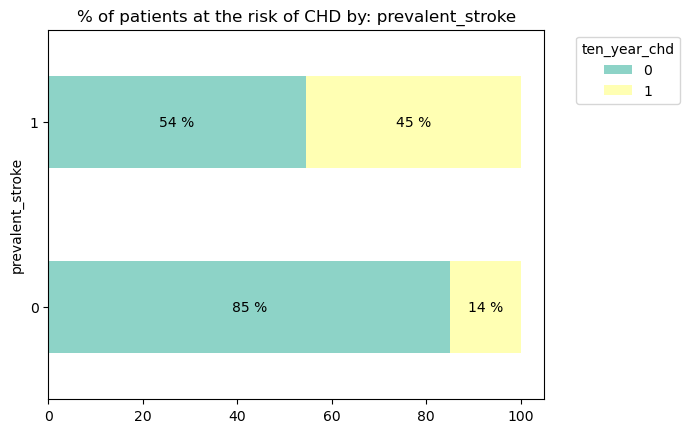

<Figure size 1000x500 with 0 Axes>

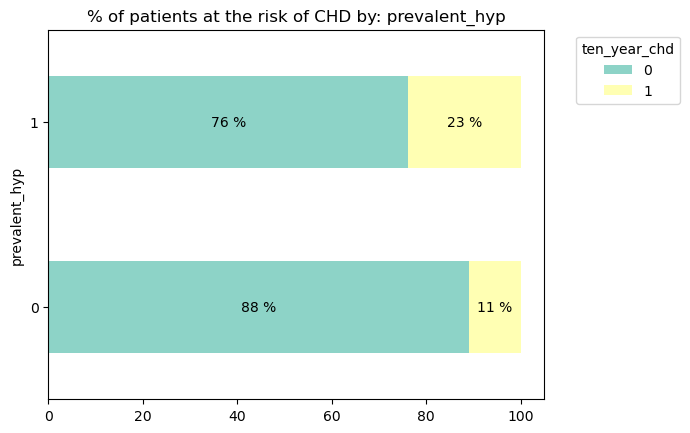

<Figure size 1000x500 with 0 Axes>

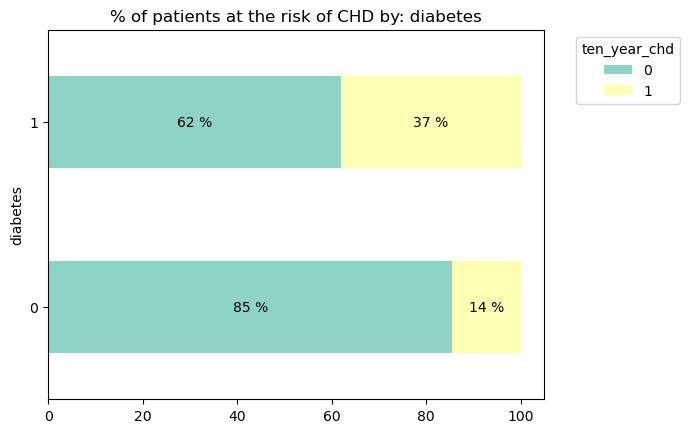

In [80]:
# Chart - 5 visualization code
for i in categorical_var[:-1]:
    x_var, y_var = i, dependent_var[0]
    plt.figure(figsize=(10,5))
    df_grouped = df_2.groupby(x_var)[y_var].value_counts(normalize=True).unstack(y_var)*100
    df_grouped.plot.barh(stacked=True,color=sns.color_palette('Set3'))

    plt.legend(
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
        title=y_var)

    plt.title("% of patients at the risk of CHD by: "+i)
    for ix, row in df_grouped.reset_index(drop=True).iterrows():
        # print(ix, row)
        cumulative = 0
        for element in row:
            if element > 0.1:
                plt.text(
                    x = cumulative + element / 2,
                    y = ix,
                    s = f"{int(element)} %",
                    va="center",
                    ha="center",
                )
            cumulative += element
    
    
    plt.show()


##### 1. Why did you pick the specific chart?

A 100% horizontal stacked bar chart is a type of data visualization that represents the composition or proportion of multiple categories within a whole. Some features of the stacked horizontal bar chart include:

Comparison of proportions: The chart displays multiple categories or groups stacked horizontally, allowing for easy visual comparison of their relative proportions within the total. Each bar represents the whole, and the segments of the bar represent the different categories or components.

Percentage representation: The stacked horizontal bar chart represents the categories as percentages of the whole. This allows for a clear understanding of the relative contributions of each category to the total.

Distribution across categories: The chart provides insights into the distribution and composition of the data across different categories. It helps identify which categories contribute more or less to the overall composition.

Facilitating trend analysis: By comparing stacked horizontal bar charts over different time periods or groups, it is possible to observe trends and changes in the composition of categories. This can provide insights into shifts in proportions or the relative importance of different categories over time.

##### 2. What is/are the insight(s) found from the chart?

The percentage of CHD as per education does not provide much information as it is similar throughout the different education categories.

For sex we see that there is a slightly higher chance of CHD in male than in female.

For is_smoking again a very slightly high percentage of CHD is seen for the positive category of is_smoking.

For bp_meds and diabetes, we see high percentage of CHD for positive cases compared to the negative case.

Finally for the positive prevalent_stroke, the percentage is almost half indicating that the positive CHD is high for positive prevalent_stroke.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The chart reveals the distribution and composition of different categories in relation to the occurrence of CHD. These insights can guide businesses in developing targeted strategies and interventions to address specific demographic groups or risk factors. For example, businesses can design preventive measures, educational campaigns, or tailored treatments to reduce the occurrence of CHD in high-risk categories. By leveraging these insights, businesses in the healthcare industry can improve patient outcomes, enhance customer satisfaction, and drive positive growth.

There are no specific insights from the chart that directly lead to negative growth. However, it's important to consider the overall prevalence of CHD and the effectiveness of interventions. If the prevalence of CHD remains high across all categories and the implemented strategies fail to yield desired outcomes, it could potentially result in negative growth due to increased healthcare costs, decreased patient satisfaction, or reputational issues. Therefore, the business impact ultimately depends on the successful implementation of strategies based on the insights gained from the chart.

#### Chart  - Correlation Heatmap

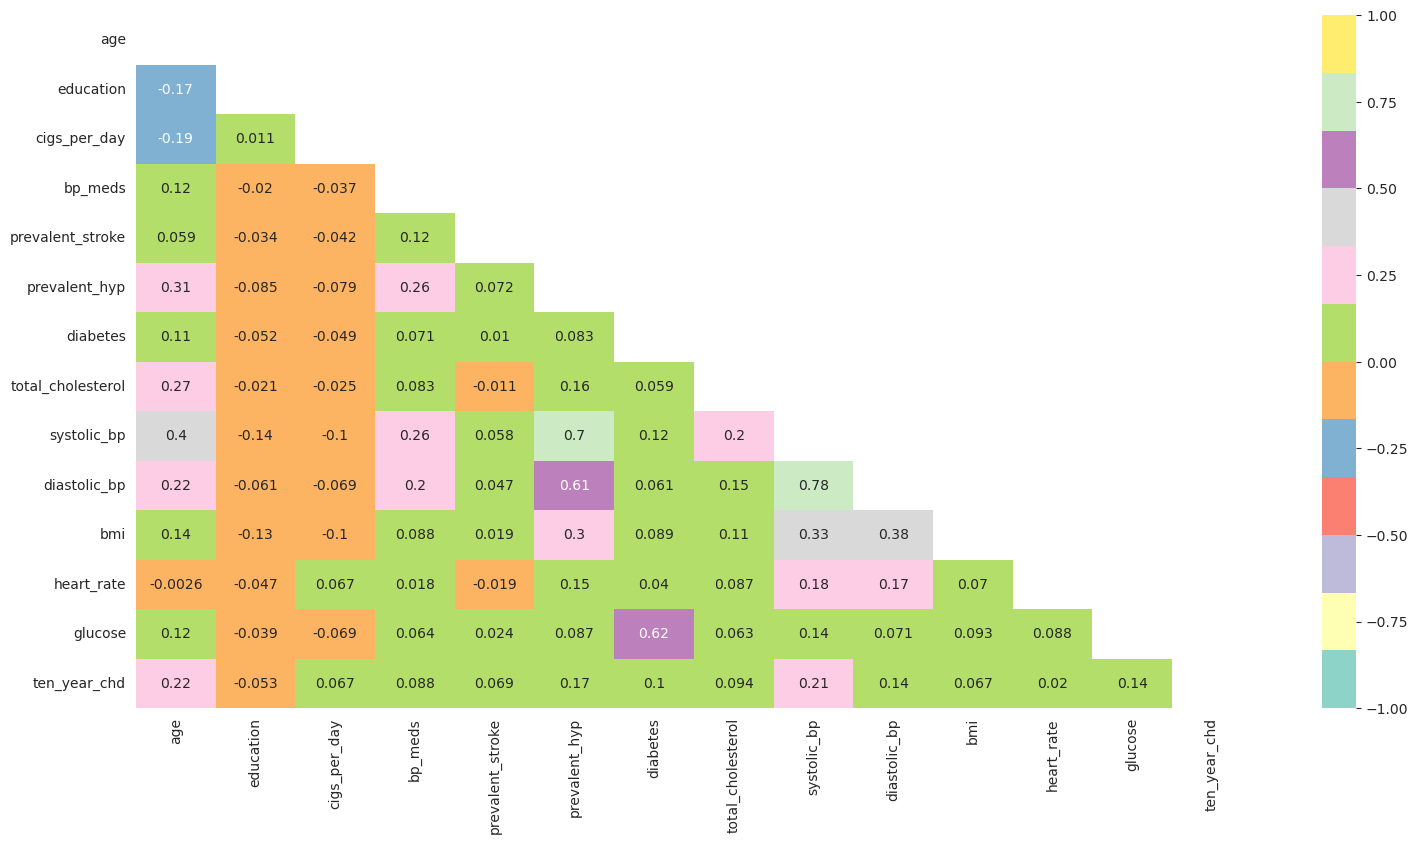

In [81]:
# Correlation Heatmap visualization code
corr = df_2.corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="Set3")

##### 1. Why did you pick the specific chart?

A correlation coefficient provides information about the strength and direction of a linear relationship between two variables. It is a valuable metric for understanding the relationships within a dataset. By calculating the correlation between all variables and visualizing it in a correlation heatmap, we gain insights into the interdependencies among variables. This heatmap enables us to identify which variables are positively or negatively correlated, helping us explore patterns and make informed decisions. The correlation coefficient ranges from -1 to 1, where -1 indicates a strong negative correlation, 1 indicates a strong positive correlation, and 0 indicates no linear correlation.

##### 2. What is/are the insight(s) found from the chart?

1. Here we see that the systolic_bp and diastolic_bp are highly correlated with coefficient of correlation 0.78.
2. Also diabetes and glucose have a correlation of 0.62.
3. Education is not important as the CHD will not be acquired based on education level of a person so we can drop education column.

#### Chart  - Pair Plot

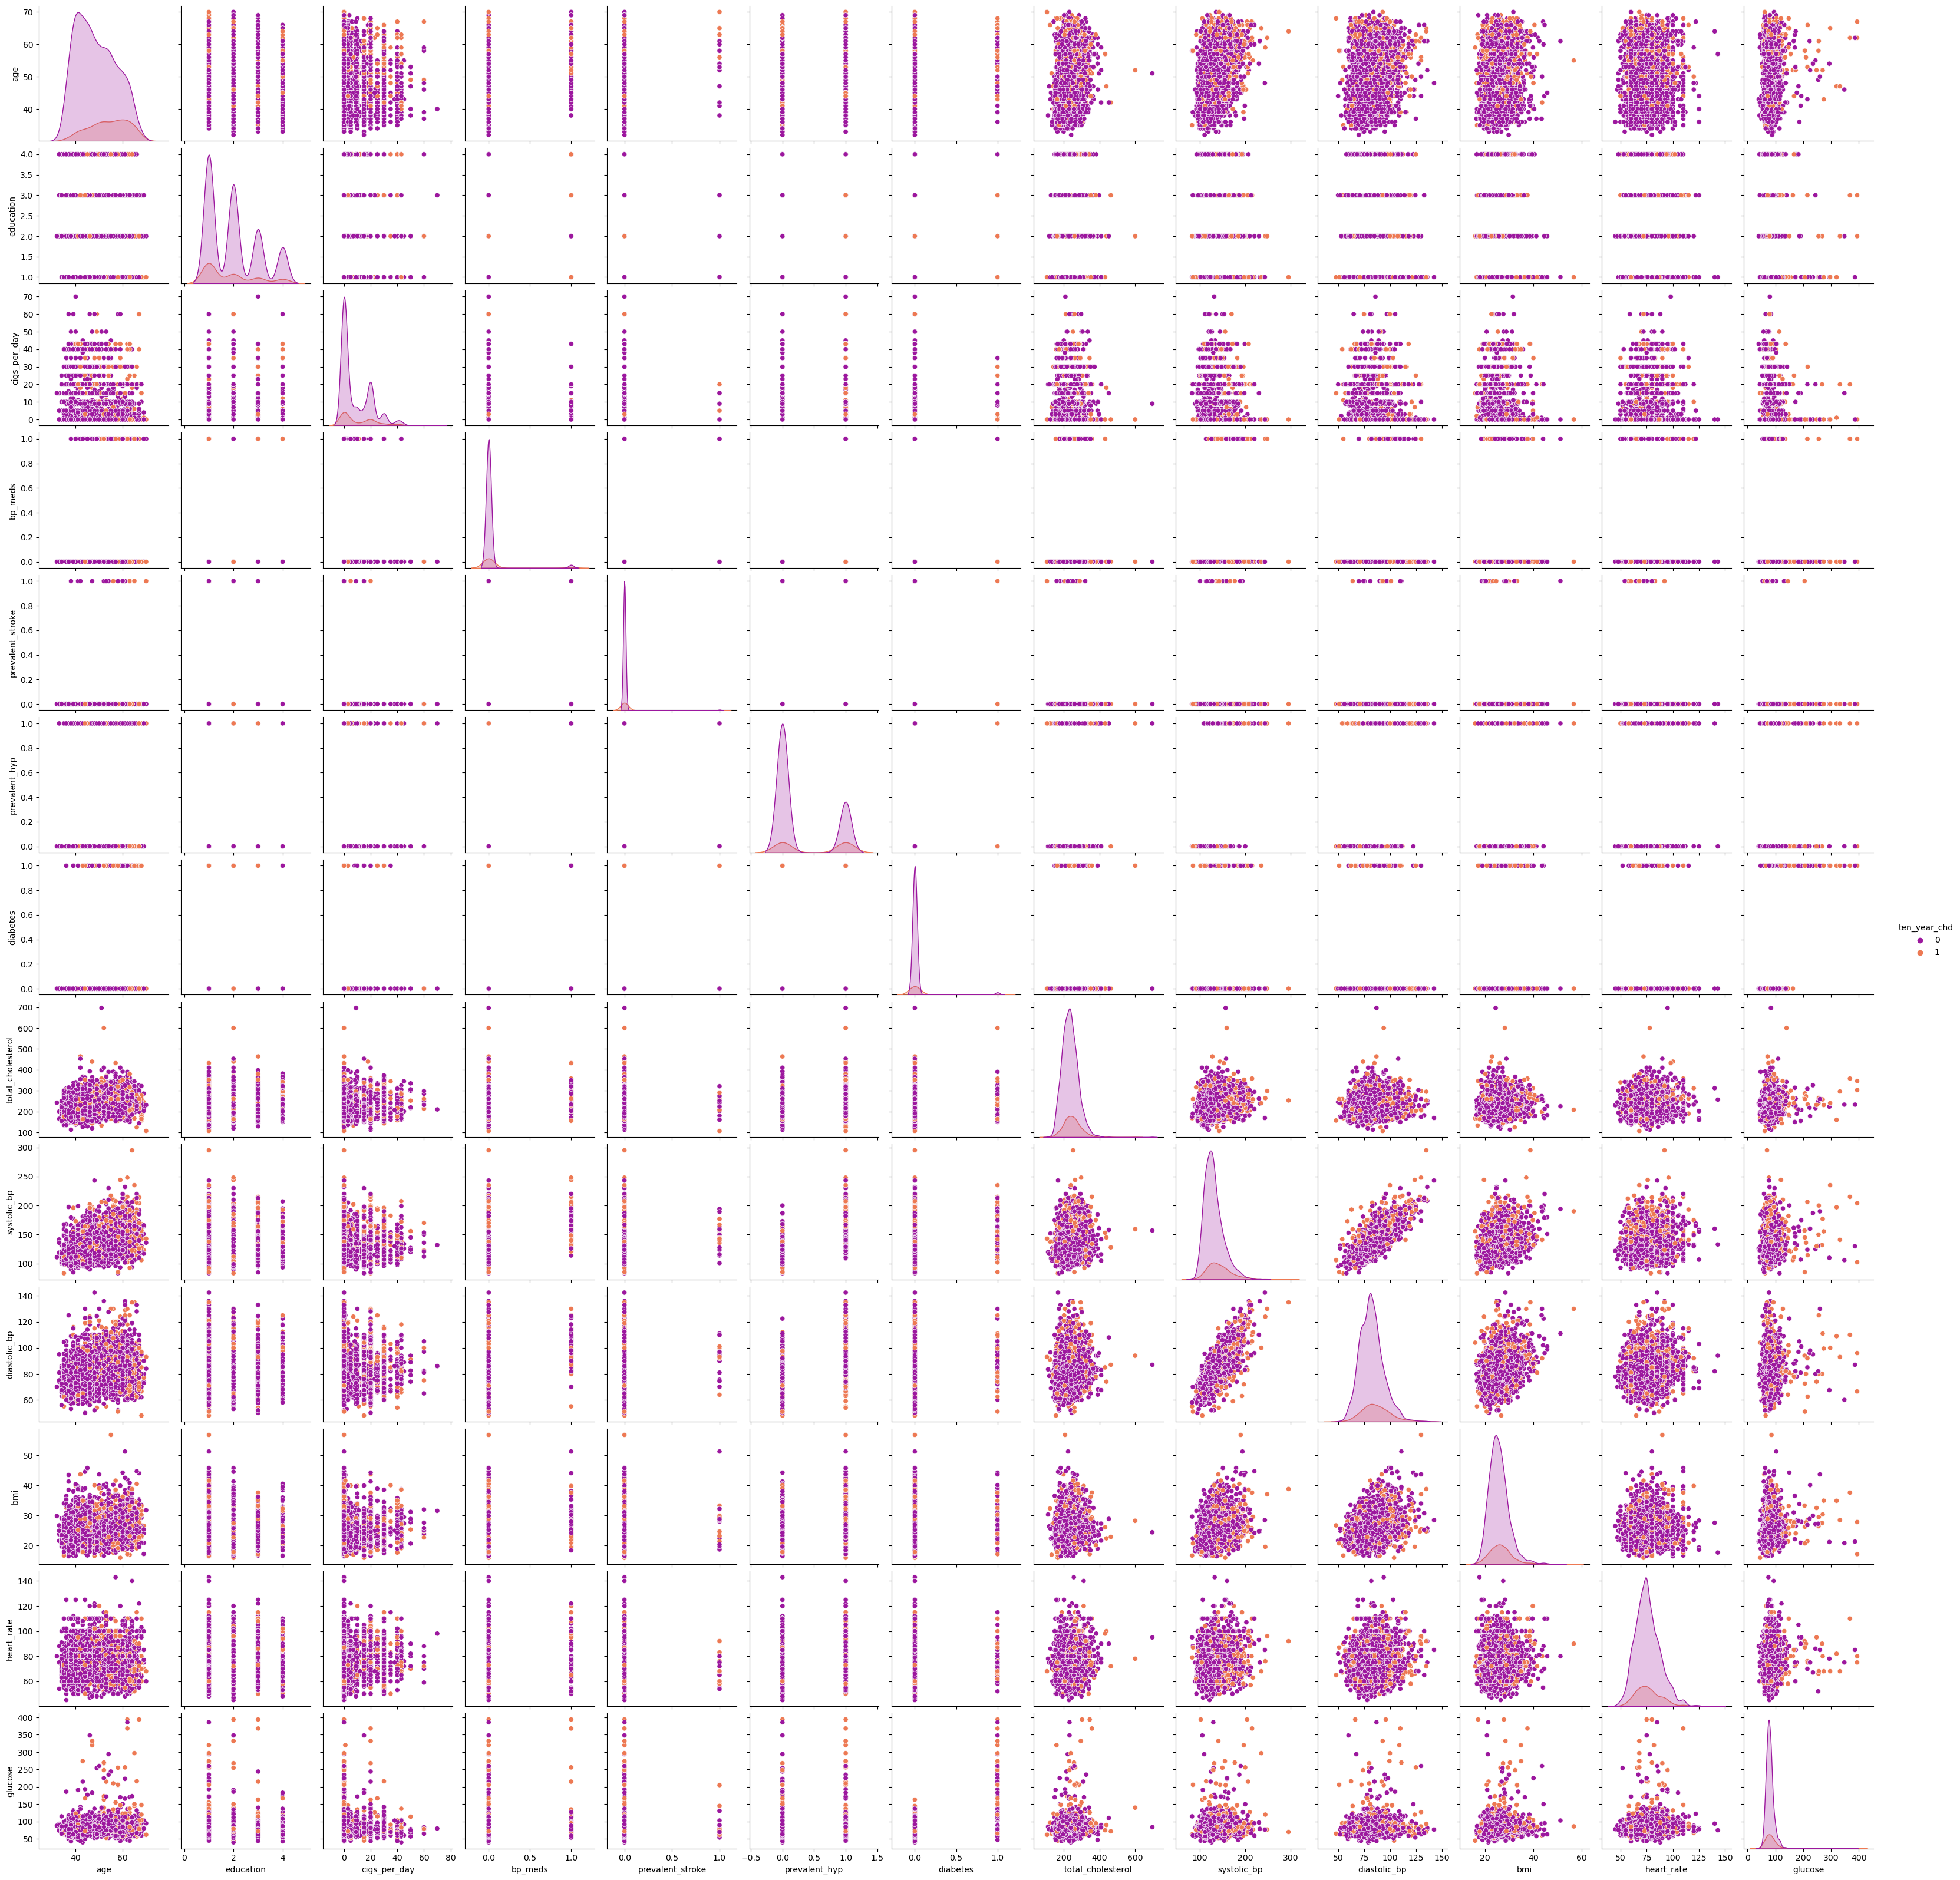

In [82]:
# Pair Plot visualization code
sns.pairplot(df_2,hue="ten_year_chd",palette='plasma')
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that allows you to visualize the relationships between all pairs of variables in a dataset. It is a useful tool for data exploration because it allows you to quickly see how all of the variables in a dataset are related to one another.

Thus, we used pair plot to analyse the patterns of data and relationship between the features. It's exactly same as the correlation map but here you will get the graphical representation.

## ***5. Hypothesis Testing***

### Hypothetical Statement

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null hypothesis**: There is no association between education level and CHD outcome.

**Alternate hypothesis**: There is an association between education level and CHD outcome.

#### 2. Perform an appropriate statistical test.

In [83]:
# Perform Statistical Test to obtain P-Value
import pandas as pd
from scipy.stats import chi2_contingency

#Create contingency table
contingency_table=pd.crosstab(df_2['education'],df_2['ten_year_chd'])
print(contingency_table)

#perform chi-squared test
chi2,p,dof,expected = chi2_contingency(contingency_table)

#print p-value
print(f'p-value: {p}')

alpha = 0.01
if p < alpha:
    print("Reject the null hypothesis: There is a significant association.")
else:
    print("Fail to reject the null hypothesis: There is no significant association.")

ten_year_chd     0    1
education              
1.0           1135  256
2.0            872  118
3.0            479   70
4.0            319   54
p-value: 6.038646749234552e-05
Reject the null hypothesis: There is a significant association.


**Since the p-value is smaller than the level of significance alpha= 0.05, we conclude that  "there is sufficient evidence to reject the null hypothesis and conclude that there is a significant association between education level and CHD .**

##### Which statistical test have you done to obtain P-Value?

To test the hypothesis that whether or not the ‘education’ column impact the outcome of chronic heart disease (CHD), I performed a chi-squared test of independence. This statistical test allowed me to determine if there was a significant association between education level and CHD outcome. By calculating the chi-squared statistic and p-value, I was able to make a statistical inference about the relationship between these two variables in our dataset.

##### Why did you choose the specific statistical test?

I chose to use the chi-squared test of independence to test the hypothesis and conclude that the ‘education’ column does impact the outcome of chronic heart disease (CHD) because it is an appropriate statistical test for determining if there is a significant association between two categorical variables. In this case, both education level and CHD outcome are categorical variables, so the chi-squared test is a suitable choice.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

**education**

In [84]:
df_2['education'] = df_2['education'].fillna(df_2['education'].mode()[0]) 

**bp_meds:**

In [85]:
df_2['bp_meds'] = df_2['bp_meds'].fillna(df_2['bp_meds'].mode()[0])

**cigs_per_day:**

In [86]:
# Mean and median number of cigarettes per day
round(df_2.cigs_per_day.mean(),0),df_2.cigs_per_day.median()

(9.0, 0.0)

In [87]:
# All missing values in the cigs_per_day column
df_2[df_2['cigs_per_day'].isna()]

age  education sex is_smoking  cigs_per_day  bp_meds  prevalent_stroke  \
422    55        1.0   F        YES           NaN      0.0                 0   
466    45        3.0   M        YES           NaN      0.0                 0   
469    42        1.0   M        YES           NaN      0.0                 0   
491    61        1.0   F        YES           NaN      0.0                 0   
538    41        1.0   F        YES           NaN      0.0                 0   
767    54        1.0   M        YES           NaN      0.0                 0   
1461   47        2.0   F        YES           NaN      0.0                 0   
1467   49        1.0   F        YES           NaN      0.0                 0   
1597   57        1.0   F        YES           NaN      0.0                 0   
1986   49        2.0   F        YES           NaN      0.0                 0   
2031   58        4.0   F        YES           NaN      0.0                 0   
2087   49        4.0   M        YES           NaN      0.0                 0   
2240   47        3.0   F        YES           NaN      0.0                 0   
2284   45        2.0   M        YES           NaN      0.0                 0   
2527   58        2.0   M        YES           NaN      0.0                 0   
2638   57        1.0   M        YES           NaN      0.0                 0   
2648   39        2.0   M        YES           NaN      0.0                 0   
2723   43        4.0   M        YES           NaN      0.0                 0   
2879   42        1.0   M        YES           NaN      0.0                 0   
2945   53        2.0   M        YES           NaN      0.0                 0   
3301   55        1.0   M        YES           NaN      0.0                 0   
3378   39        3.0   F        YES           NaN      0.0                 0   

      prevalent_hyp  diabetes  total_cholesterol  systolic_bp  diastolic_bp  \
422               1         0              213.0        163.0          91.0   
466               1         0              170.0        145.5          99.0   
469               0         0              196.0        123.0          73.0   
491               1         0              356.0        168.0          98.0   
538               0         0              171.0        135.0          82.5   
767               0         0              219.0        110.0          72.0   
1461              0         0              365.0        127.0          76.0   
1467              0         0              252.0        123.0          69.0   
1597              0         0              229.0        115.0          69.0   
1986              1         0              233.0        158.0         102.0   
2031              1         0              270.0        195.0         117.5   
2087              0         0              256.0        127.5          81.5   
2240              0         0              321.0        132.0          88.0   
2284              0         0              248.0        121.0          72.0   
2527              0         0              235.0        127.5          76.0   
2638              0         0              223.0        107.5          72.5   
2648              0         0              285.0        121.0          82.0   
2723              0         0              222.0        109.5          69.0   
2879              0         0              226.0        119.0          80.0   
2945              0         0              276.0        130.0          86.0   
3301              0         0              214.0        132.5          85.5   
3378              0         0              197.0        126.5          76.5   

        bmi  heart_rate  glucose  ten_year_chd  
422   28.66        69.0     66.0             0  
466   26.74        83.0     85.0             0  
469   22.06        66.0      NaN             0  
491   27.30       103.0    106.0             0  
538   24.35        79.0     82.0             0  
767   26.05        95.0     86.0             0  
1461

**Based on the observation, it appears that all entries with missing values for the "cigs per day" variable have a corresponding "is smoking" column value of "YES," indicating that these individuals smoke.**

In [88]:
# Imputing the missing values in the cigs_per_day with median value of cig_per_day for smokers.
df_2['cigs_per_day'] = df_2['cigs_per_day'].fillna(df_2[df_2['is_smoking']=='YES']['cigs_per_day'].median())

**Cholesterol - BMI - Heartrate**

In [89]:
# Mean and median for total_cholesterol
print(f'Cholestrol : {df_2.total_cholesterol.mean(),df_2.total_cholesterol.median()}')

# Mean and median for bmi
print(f'BMI : {df_2.bmi.mean(),df_2.bmi.median()}')

# Mean and median for heart_rate
print(f'Heart Rate : {df_2.heart_rate.mean(),df_2.heart_rate.median()}')

Cholestrol : (237.07428400954655, 234.0)
BMI : (25.794964454976267, 25.38)
Heart Rate : (75.97727943346119, 75.0)


In [90]:
# Imputing missing values in the total_cholesterol, bmi, and heart_rate with their medain values
df_2['total_cholesterol'] = df_2['total_cholesterol'].fillna(df_2['total_cholesterol'].median())
df_2['bmi'] = df_2['bmi'].fillna(df_2['bmi'].median())
df_2['heart_rate'] = df_2['heart_rate'].fillna(df_2['heart_rate'].median())

**Glucose: KNN imputation**

In [91]:
# total missing values in glucose
df_2.glucose.isna().sum()

304

1. **In the glucose column, 304 data points are missing. Using the mean or median to fill in these values could introduce significant inaccuracies**.
2. **To counteract this, the KNN imputer method could be employed to replace the missing data**.

In [92]:
# Highly positively skewed
df_2.glucose.skew()

6.1443896544049394

In [93]:
# Replacing the string values of the categorical  column with 0 and 1

df_2['sex'] = np.where(df_2['sex'] == 'M',1,0)
df_2['is_smoking'] = np.where(df_2['is_smoking'] == 'YES',1,0)

In [94]:
# Using KNN imputer with K=10
imputer = KNNImputer(n_neighbors=6)
imputed = imputer.fit_transform(df_2)
df_2 = pd.DataFrame(imputed, columns=df_2.columns)

In [95]:
# checking for missing values
df_2.isna().sum()

age                  0
education            0
sex                  0
is_smoking           0
cigs_per_day         0
bp_meds              0
prevalent_stroke     0
prevalent_hyp        0
diabetes             0
total_cholesterol    0
systolic_bp          0
diastolic_bp         0
bmi                  0
heart_rate           0
glucose              0
ten_year_chd         0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

I employed various techniques, such as median, mode, and KNN imputation, to address the missing values in my dataset. Each technique was selected based on its suitability for the specific characteristics of the data and the problem at hand.

For numerical variables that exhibited skewness or were prone to outliers, I utilized median imputation. By replacing missing values with the median, which is a robust measure of central tendency, I mitigated the influence of extreme values and ensured a more representative estimate.

In the case of categorical variables, I opted for mode imputation. The mode, being the most frequent value, provided a reasonable approximation for the missing values within those variables.

To leverage the patterns and relationships present in the data, I employed KNN imputation on glucose column. This method identifies similar observations within the dataset and utilizes their values to impute missing values. By considering the characteristics of neighboring data points, the imputed values were likely to be more accurate and reflective of the underlying patterns.Glucose column had higher number of null values in it . Also it was a continuous column showing skewness .So KNN imputation was the best technique to apply to fill the missing values.

By employing these diverse imputation techniques, I aimed to handle the missing values appropriately, accounting for the nature of the variables and the unique requirements of the analysis.

### 2. Handling Outliers

In [96]:
numerical_var

['age',
 'cigs_per_day',
 'total_cholesterol',
 'systolic_bp',
 'diastolic_bp',
 'bmi',
 'heart_rate',
 'glucose']

In [97]:
# Handling Outliers & Outlier treatments using IQR method.
for col in numerical_var:
  q1=df_2[col].quantile(0.25)
  q3=df_2[col].quantile(0.75)
  IQR=q3 - q1
  lower_limit=q1 - 1.5*IQR
  upper_limit=q3 + 1.5*IQR
  df_2[col]=np.where(df_2[col]>upper_limit,upper_limit,np.where(df_2[col]<lower_limit,lower_limit,df_2[col]))

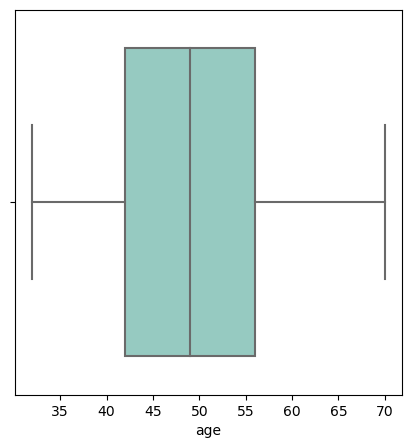

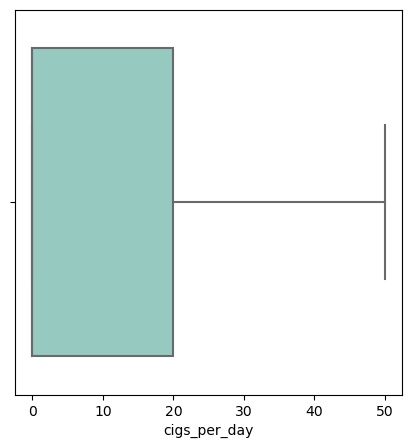

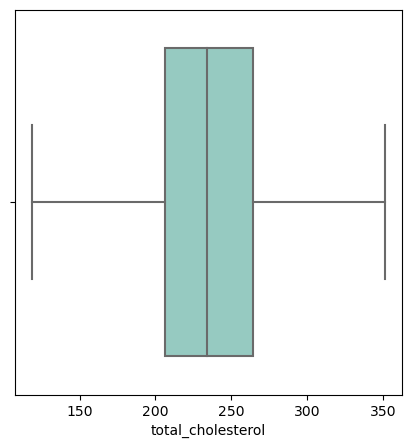

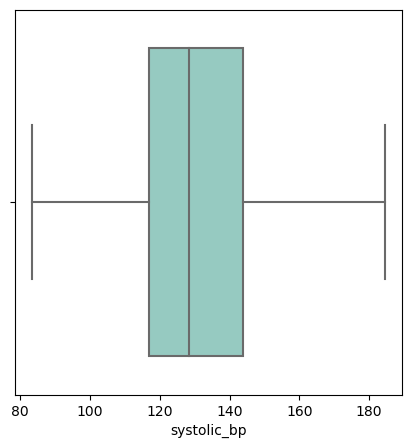

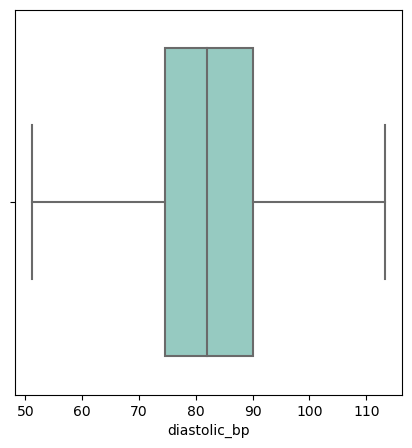

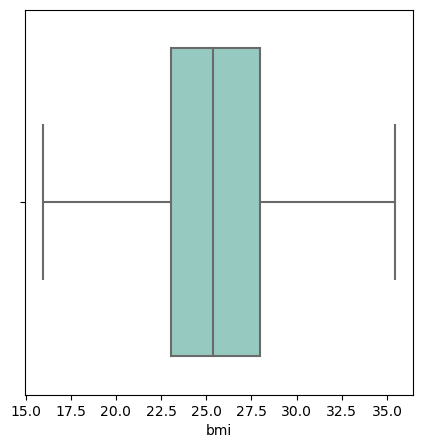

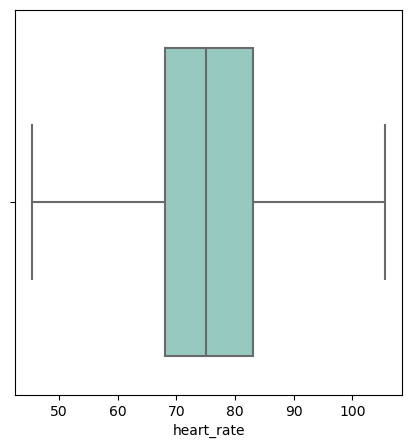

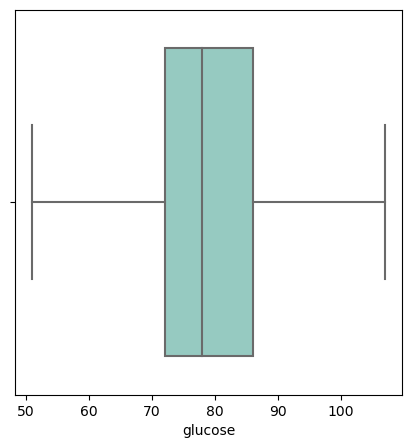

In [98]:
for col in numerical_var:
  plt.figure(figsize=(5,5))
  sns.boxplot(data = df_2,x=col,palette="Set3")
  plt.show()

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [99]:
# Manipulate Features to minimize feature correlation and create new features

#remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif=pd.DataFrame()
  vif['variables']=X.columns
  vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
  return vif

In [100]:
calc_vif(df_2[numerical_var])

variables         VIF
0                age   42.850361
1       cigs_per_day    1.641411
2  total_cholesterol   33.353324
3        systolic_bp  124.491970
4       diastolic_bp  135.507099
5                bmi   50.070214
6         heart_rate   40.629280
7            glucose   39.133700

In [101]:
# Creating a new column pulse_pressure and dropping systolic_bp and diastolic_bp

df_2['pulse_pressure'] = df_2['systolic_bp']-df_2['diastolic_bp']
df_2.drop('systolic_bp',axis=1,inplace=True)
df_2.drop('diastolic_bp',axis=1,inplace=True)

In [102]:
# Updating the numrical_var list

numerical_var.remove('systolic_bp')
numerical_var.remove('diastolic_bp')
numerical_var.append('pulse_pressure')

In [103]:
calc_vif(df_2[numerical_var])

variables        VIF
0                age  41.893504
1       cigs_per_day   1.639371
2  total_cholesterol  32.816545
3                bmi  40.237688
4         heart_rate  37.634835
5            glucose  38.825396
6     pulse_pressure  17.545208

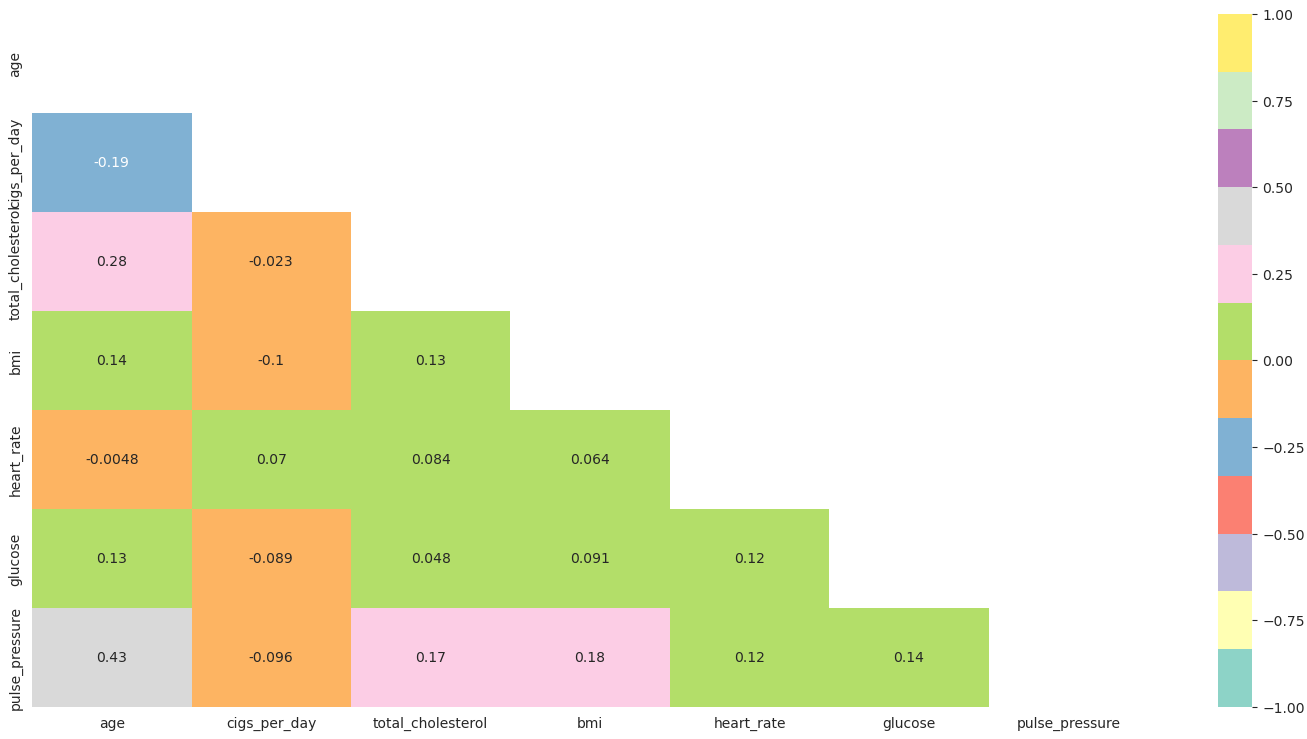

In [104]:
corr = df_2[numerical_var].corr()
mask = np.zeros_like(corr)

mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 9))
    ax = sns.heatmap(corr , mask=mask, vmin = -1,vmax=1, annot = True, cmap="Set3")

#### 2. Feature Selection

In [105]:
# Select your features wisely to avoid overfitting
# dropping is_smoking
df_2.drop('is_smoking',axis=1,inplace=True)
categorical_var.remove('is_smoking')
categorical_var

['education',
 'sex',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'ten_year_chd']

##### What all feature selection methods have you used  and why?

We have used variance inflation factor to remove multicollinearity and we found that the systolic and diastolic blood pressure have high VIF, so we created a new feature which is pulse pressure.

It was also found that the is smoking column just had the values yes or no for smoking and the same was conveyed in the cigs per day column where for non smoker, the column had 0 and for smoker it had the number of cigeratte per day.

##### Which all features you found important?

In [106]:
df_2.columns

Index(['age', 'education', 'sex', 'cigs_per_day', 'bp_meds',
       'prevalent_stroke', 'prevalent_hyp', 'diabetes', 'total_cholesterol',
       'bmi', 'heart_rate', 'glucose', 'ten_year_chd', 'pulse_pressure'],
      dtype='object')

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [107]:
# Transform Your data
df_2[numerical_var].skew()

age                  0.225796
cigs_per_day         1.127284
total_cholesterol    0.340533
bmi                  0.450492
heart_rate           0.418170
glucose              0.479422
pulse_pressure       0.946833
dtype: float64

In [108]:
#applying sqrt transformation on cigs_per_day and pulse_pressure because both of the columns are lightly skewed while rest of the columns are close to normal
df_2['cigs_per_day']          = np.sqrt(df_2['cigs_per_day'])
df_2['pulse_pressure']        = np.sqrt(df_2['pulse_pressure'])

In [109]:
df_2[numerical_var].skew()

age                  0.225796
cigs_per_day         0.449712
total_cholesterol    0.340533
bmi                  0.450492
heart_rate           0.418170
glucose              0.479422
pulse_pressure       0.550119
dtype: float64

### 6. Data Scaling

In [110]:
# Scaling your data
scaler=StandardScaler()
df_2_numerical_scaled=scaler.fit_transform(df_2[numerical_var])

In [111]:
features = [i for i in df_2.columns if i not in ['ten_year_chd']]
features

['age',
 'education',
 'sex',
 'cigs_per_day',
 'bp_meds',
 'prevalent_stroke',
 'prevalent_hyp',
 'diabetes',
 'total_cholesterol',
 'bmi',
 'heart_rate',
 'glucose',
 'pulse_pressure']

In [112]:
# Create a new dataframe with the scaled numerical columns
df_2_numerical_scaled = pd.DataFrame(df_2_numerical_scaled, columns=numerical_var)

# Combine the scaled numerical columns with the categorical columns
df_scaled=pd.concat([df_2_numerical_scaled, df_2.drop(numerical_var, axis=1)],axis=1)

In [113]:
df_scaled

age  cigs_per_day  total_cholesterol       bmi  heart_rate  \
0     1.682783     -0.131026          -0.362779 -0.085301    1.226815   
1    -1.576210     -0.904920          -0.572897  1.066765   -0.332741   
2    -0.412284      0.508011           0.314268 -1.405321    1.053531   
3     0.053287      1.093267          -0.082622  0.670496   -0.679309   
4     1.682783      1.542349           0.104150  0.187626   -0.506025   
...        ...           ...                ...       ...         ...   
3385  1.217213     -0.904920           0.571079  0.938174   -0.506025   
3386 -0.412284     -0.904920          -0.876401 -0.982809    0.360395   
3387 -0.645069     -0.131026           2.672259  0.843700   -0.246099   
3388  1.217213     -0.904920          -1.063172 -0.707258    0.360395   
3389  0.518857     -0.904920           1.201433  1.095632    0.273753   

       glucose  pulse_pressure  education  sex  bp_meds  prevalent_stroke  \
0     0.006712        1.023762        2.0  0.0      0.0               0.0   
1    -0.406722        1.474850        4.0  1.0      0.0               0.0   
2     1.164327       -0.267527        1.0  0.0      0.0               0.0   
3     1.164327        1.474850        1.0  1.0      0.0               0.0   
4    -0.241349        0.224326        1.0  0.0      0.0               0.0   
...        ...             ...        ...  ...      ...               ...   
3385  1.908508       -0.306792        1.0  0.0      0.0               0.0   
3386  0.337459       -0.189648        1.0  0.0      0.0               0.0   
3387 -0.654783        0.169223        3.0  1.0      0.0               0.0   
3388  0.420146        0.957313        1.0  1.0      0.0               0.0   
3389  0.998953       -0.112610        3.0  0.0      0.0               0.0   

      prevalent_hyp  diabetes  ten_year_chd  
0               0.0       0.0           1.0  
1               1.0       0.0           0.0  
2               0.0       0.0           0.0  
3               1.0       0.0           1.0  
4               0.0       0.0           0.0  
...             ...       ...           ...  
3385            0.0       0.0           0.0  
3386            0.0       0.0           0.0  
3387            1.0       0.0           1.0  
3388            1.0       0.0           0.0  
3389            0.0       0.0           0.0  

[3390 rows x 14 columns]

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is not needed. We have already reduced the number of features and only the important features are left.

### 8. Data Splitting

In [114]:
X=df_scaled.drop('ten_year_chd',axis=1)
y=df_scaled['ten_year_chd']

In [115]:
# Split your data to train and test. Choose Splitting ratio wisely.
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=19, stratify=y)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes the dataset is imbalanced and the number of positive cases is very low compared to the negative cases.

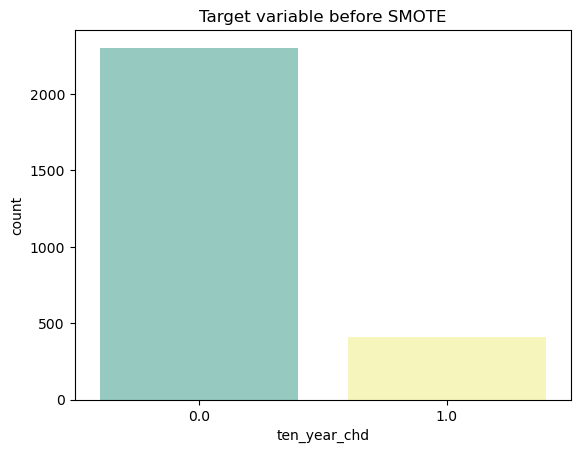

In [116]:
# Handling Imbalanced Dataset (If needed)
# visualize the target variable before SMOTE
sns.countplot(x=y_train,palette='Set3')
plt.title('Target variable before SMOTE')
plt.show()

In [117]:
# Oversampling using SMOTETomek
smote=SMOTETomek(random_state=19)
X_smote,y_smote= smote.fit_resample(X_train,y_train)

print('Samples in the original dataset: ', len(y_train))
print('Samples in the resampled dataset: ', len(y_smote))

Samples in the original dataset:  2712
Samples in the resampled dataset:  4586


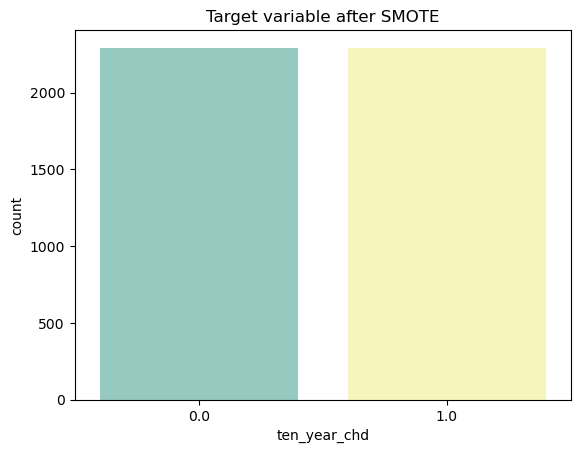

In [118]:
# visualize the target variable after SMOTE
sns.countplot(x=y_smote,palette='Set3')
plt.title('Target variable after SMOTE')
plt.show()

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I used the SMOTE (oversampling technique) combined with Tomek links undersampling technique to handle the imbalanced dataset. SMOTE works by generating synthetic samples from the minority class to balance the class distribution. It does this by selecting instances that are close in the feature space and drawing a line between them, then creating new instances along this line. Tomek links undersampling removes Tomek links, which are pairs of instances from different classes that are very close to each other in the feature space. By removing these instances, the decision boundary between the classes can be made clearer.

I chose to use this technique because it can improve the performance of machine learning models on imbalanced datasets by balancing the class distribution and making the decision boundary between classes clearer. By combining oversampling of the minority class with undersampling of the majority class, I was able to achieve a balanced dataset while also removing potential noise and ambiguity from the data.

## ***7. ML Model Implementation***

In [119]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # fit the model on the training data
    model.fit(X_train, y_train)

    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(12, 4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="BuPu", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")

    try:
      try:
        feature_importance = model.feature_importances_
      except:
        feature_importance = model.coef_
      feature_importance = np.absolute(feature_importance)
      if len(feature_importance)==len(features):
        pass
      else:
        feature_importance = feature_importance[0]


      feat = pd.Series(feature_importance, index=features)
      feat = feat.sort_values(ascending=True)
      plt.figure(figsize=(10,6))
      plt.title('Feature Importances for '+str(model), fontsize = 18)
      plt.xlabel('Relative Importance')
      feat.plot(kind='barh')
    except AttributeError:
        print("\nThe model does not have feature importances attribute.")

    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

In [120]:
# Create a score dataframe
score = pd.DataFrame(index = ['Weighted Precision Train', 'Weighted Precision Test','Weighted Recall Train','Weighted Recall Test','Accuracy Train', 'Accuracy Test','ROC-AUC Train', 'ROC-AUC Test','F1 weighted Train', 'F1 weighted Test'])

### ML Model - 1 : **Logistic Regression**

In [121]:
lr_model = LogisticRegression(fit_intercept=True, max_iter=10000)


Train ROC AUC: 0.6711731356301788
Test ROC AUC: 0.6588541666666666


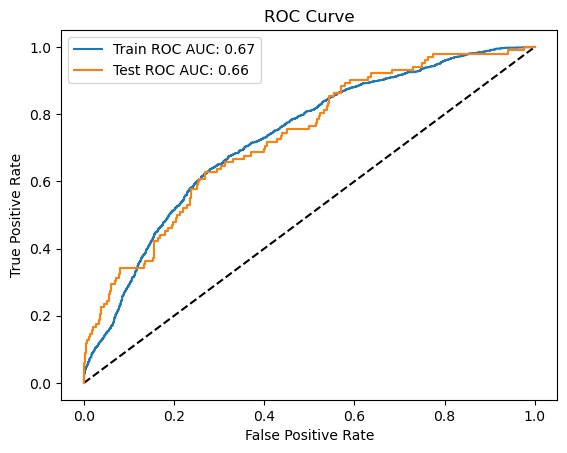


Confusion Matrix:


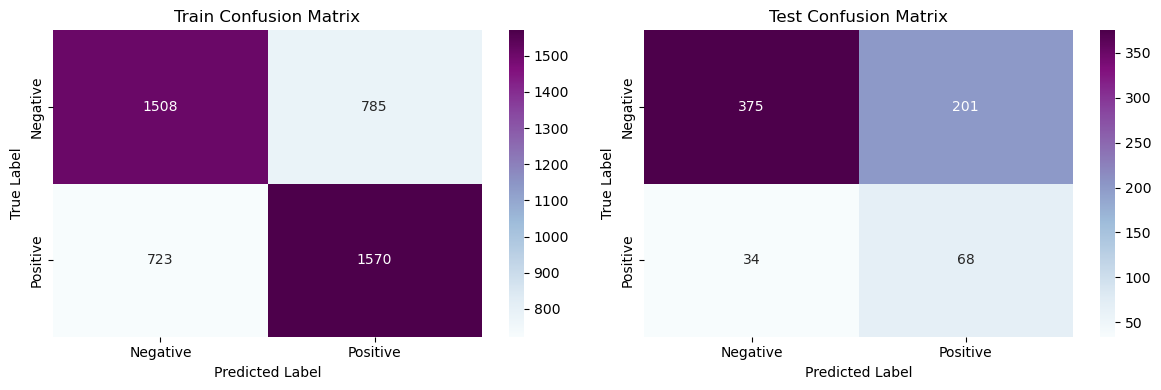


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.67593  | 0.657654 |   0.666667 | 2293        |
| 1.0          |    0.666667 | 0.684693 |   0.675559 | 2293        |
| accuracy     |    0.671173 | 0.671173 |   0.671173 |    0.671173 |
| macro avg    |    0.671298 | 0.671173 |   0.671113 | 4586        |
| weighted avg |    0.671298 | 0.671173 |   0.671113 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.91687  | 0.651042 |   0.761421 | 576        |
| 1.0          |    0.252788 | 0.666667 |   0.366577 | 102        |
| accuracy     |    0.653392 | 0.653392 |   0.653392 |   0.653392 |
| macro avg    |    0.584829 | 0.658854 |   0.563999 | 678        |
| weighted avg |    0.816964 | 0.653392 |   0.7020

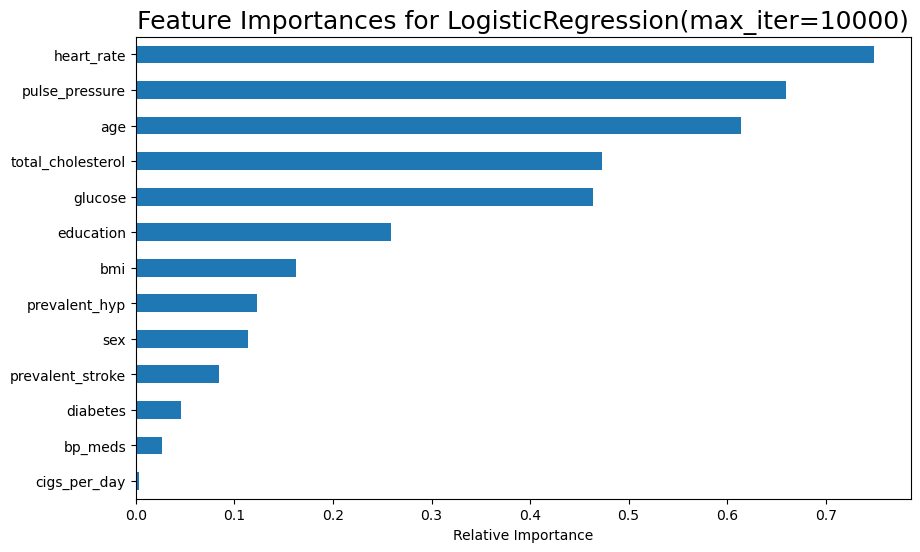

In [122]:
lr_score = evaluate_model(lr_model, X_smote, X_test, y_smote, y_test)

In [123]:
score['Logistic regression'] = lr_score
score

Logistic regression
Precision Train             0.671298
Precision Test              0.816964
Recall Train                0.671173
Recall Test                 0.653392
Accuracy Train              0.671173
Accuracy Test               0.653392
ROC-AUC Train               0.671173
ROC-AUC Test                0.658854
F1 macro Train              0.671113
F1 macro Test               0.702020

#### 2. Cross- Validation & Hyperparameter Tuning

In [124]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid = {'C': [100,10,1,0.1,0.01,0.001,0.0001],
              'penalty': ['l1', 'l2'],
              'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}

# Initializing the logistic regression model
logreg = LogisticRegression(fit_intercept=True, max_iter=10000, random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=4, random_state=0)

# Using GridSearchCV to tune the hyperparameters using cross-validation
grid = GridSearchCV(logreg, param_grid, cv=rskf)
grid.fit(X_smote, y_smote)

best_params = grid.best_params_
# The best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", best_params)

Best hyperparameters:  {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}


In [125]:
# Initiate model with best parameters
lr_model2 = LogisticRegression(C=best_params['C'],
                                  penalty=best_params['penalty'],
                                  solver=best_params['solver'],
                                  max_iter=10000, random_state=0)


Train ROC AUC: 0.6716092455298734
Test ROC AUC: 0.6588541666666666


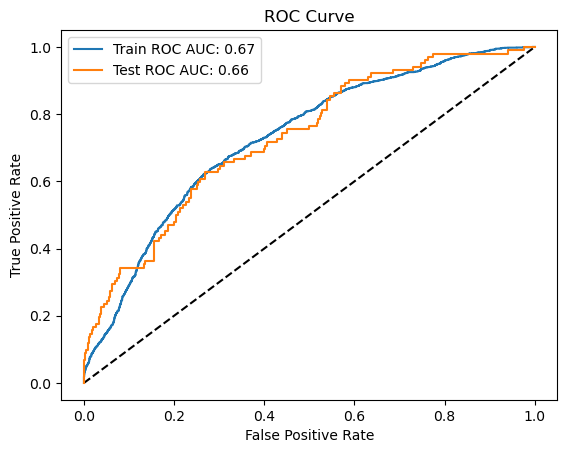


Confusion Matrix:


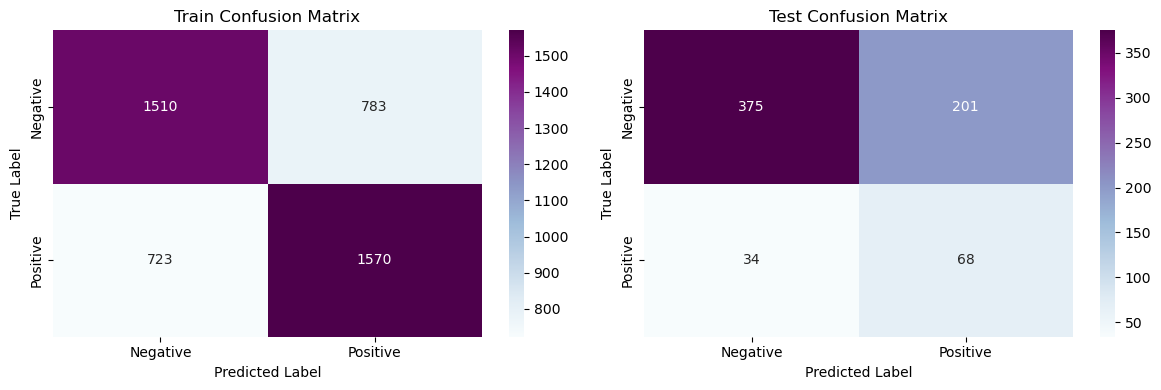


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.67622  | 0.658526 |   0.667256 | 2293        |
| 1.0          |    0.667233 | 0.684693 |   0.67585  | 2293        |
| accuracy     |    0.671609 | 0.671609 |   0.671609 |    0.671609 |
| macro avg    |    0.671727 | 0.671609 |   0.671553 | 4586        |
| weighted avg |    0.671727 | 0.671609 |   0.671553 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.91687  | 0.651042 |   0.761421 | 576        |
| 1.0          |    0.252788 | 0.666667 |   0.366577 | 102        |
| accuracy     |    0.653392 | 0.653392 |   0.653392 |   0.653392 |
| macro avg    |    0.584829 | 0.658854 |   0.563999 | 678        |
| weighted avg |    0.816964 | 0.653392 |   0.7020

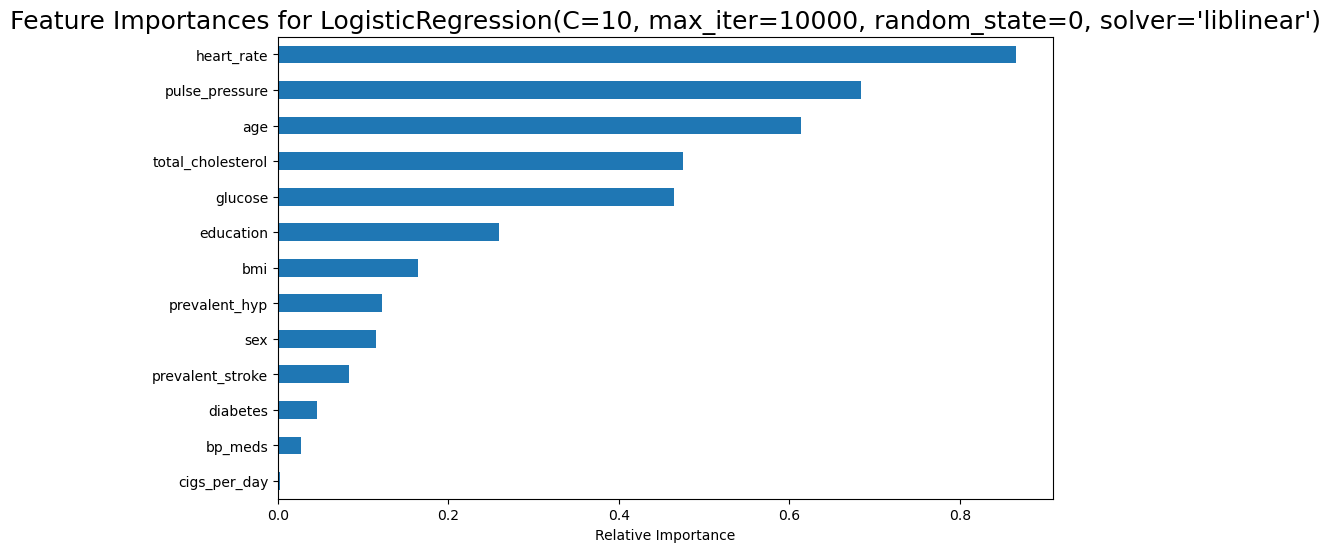

In [126]:
# Visualizing evaluation Metric Score chart
lr_score2 = evaluate_model(lr_model2, X_smote, X_test, y_smote, y_test)

In [127]:
score['Logistic regression tuned'] = lr_score2
score

Logistic regression  Logistic regression tuned
Precision Train             0.671298                   0.671727
Precision Test              0.816964                   0.816964
Recall Train                0.671173                   0.671609
Recall Test                 0.653392                   0.653392
Accuracy Train              0.671173                   0.671609
Accuracy Test               0.653392                   0.653392
ROC-AUC Train               0.671173                   0.671609
ROC-AUC Test                0.658854                   0.658854
F1 macro Train              0.671113                   0.671553
F1 macro Test               0.702020                   0.702020

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [128]:
score

Logistic regression  Logistic regression tuned
Precision Train             0.671298                   0.671727
Precision Test              0.816964                   0.816964
Recall Train                0.671173                   0.671609
Recall Test                 0.653392                   0.653392
Accuracy Train              0.671173                   0.671609
Accuracy Test               0.653392                   0.653392
ROC-AUC Train               0.671173                   0.671609
ROC-AUC Test                0.658854                   0.658854
F1 macro Train              0.671113                   0.671553
F1 macro Test               0.702020                   0.702020

It appears that hyperparameter tuning did not improve the performance of the Logistic Regression model on the test set. The precision, recall, accuracy, ROC-AUC, and F1 scores on the test set are the same for both the untuned and tuned Logistic Regression models.

### ML Model - 2 : **Decision Tree**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [129]:
# ML Model - 2 Implementation
dt = DecisionTreeClassifier(random_state=0)


Train ROC AUC: 1.0
Test ROC AUC: 0.583078022875817


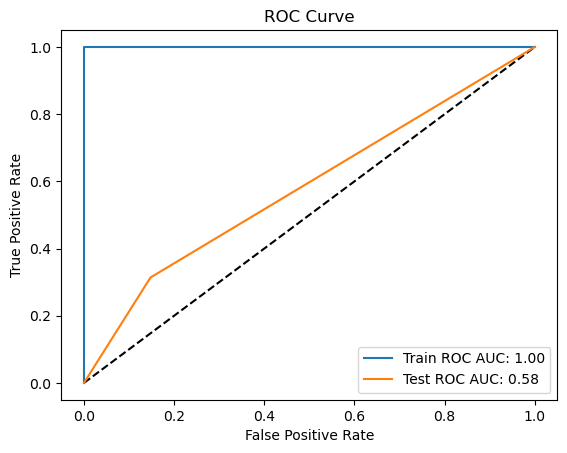


Confusion Matrix:


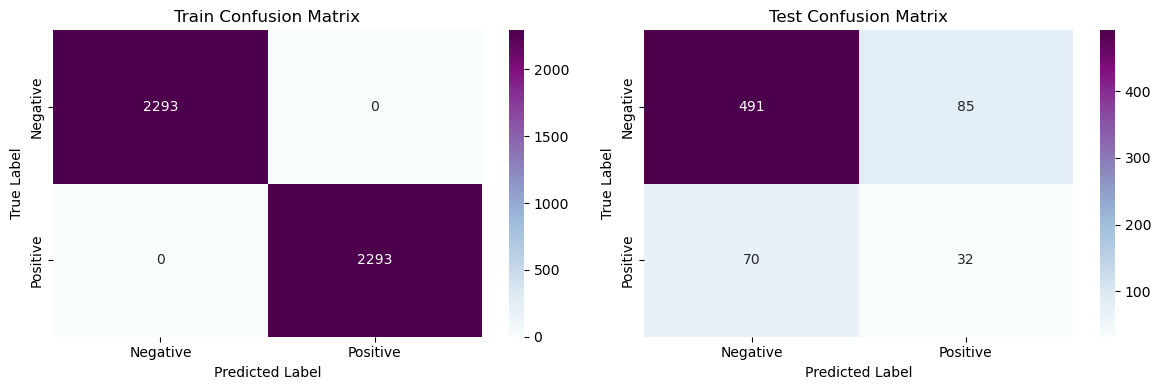


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.875223 | 0.852431 |   0.863676 | 576        |
| 1.0          |    0.273504 | 0.313725 |   0.292237 | 102        |
| accuracy     |    0.771386 | 0.771386 |   0.771386 |   0.771386 |
| macro avg    |    0.574364 | 0.583078 |   0.577957 | 678        |
| weighted avg |    0.784699 | 0.771386 |   0.777708 | 678      

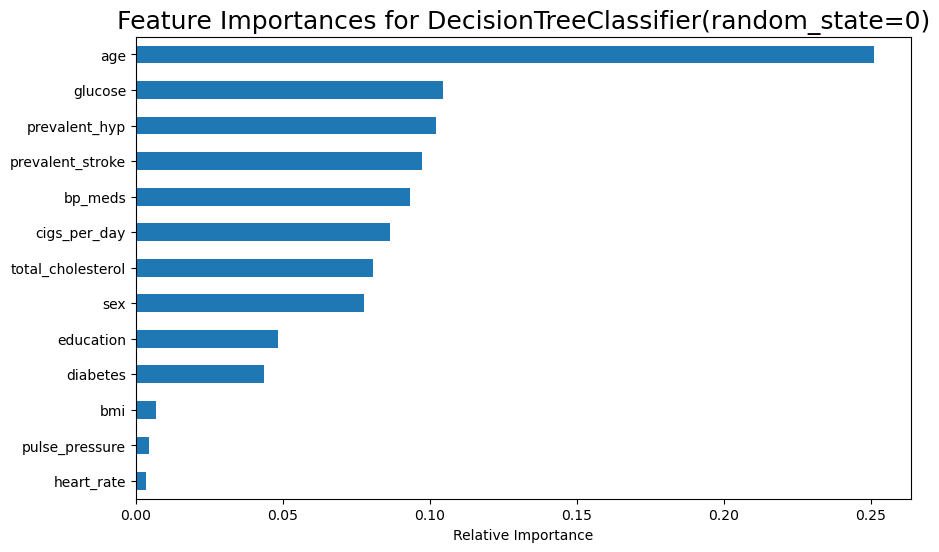

In [130]:
# Visualizing evaluation Metric Score chart
dt_score = evaluate_model(dt, X_smote, X_test, y_smote, y_test)

In [131]:
score['Decision Tree'] = dt_score
score

Logistic regression  Logistic regression tuned  Decision Tree
Precision Train             0.671298                   0.671727       1.000000
Precision Test              0.816964                   0.816964       0.784699
Recall Train                0.671173                   0.671609       1.000000
Recall Test                 0.653392                   0.653392       0.771386
Accuracy Train              0.671173                   0.671609       1.000000
Accuracy Test               0.653392                   0.653392       0.771386
ROC-AUC Train               0.671173                   0.671609       1.000000
ROC-AUC Test                0.658854                   0.658854       0.583078
F1 macro Train              0.671113                   0.671553       1.000000
F1 macro Test               0.702020                   0.702020       0.777708

#### 2. Cross- Validation & Hyperparameter Tuning

In [132]:
# Define the hyperparameter grid
grid = {'max_depth' : [3,4,5,6,7,8],
        'min_samples_split' : np.arange(2,8),
        'min_samples_leaf' : np.arange(10,20)}

# Initialize the model
model = DecisionTreeClassifier()

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize GridSearchCV
grid_search = GridSearchCV(model, grid, cv=rskf)

# Fit the GridSearchCV to the training data
grid_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = grid_search.best_params_
best_params

{'max_depth': 8, 'min_samples_leaf': 10, 'min_samples_split': 4}

In [133]:
# Train a new model with the best hyperparameters
dt2 = DecisionTreeClassifier(max_depth=best_params['max_depth'],
                                 min_samples_leaf=best_params['min_samples_leaf'],
                                 min_samples_split=best_params['min_samples_split'],
                                 random_state=20)


Train ROC AUC: 0.8102921936327954
Test ROC AUC: 0.6331188725490196


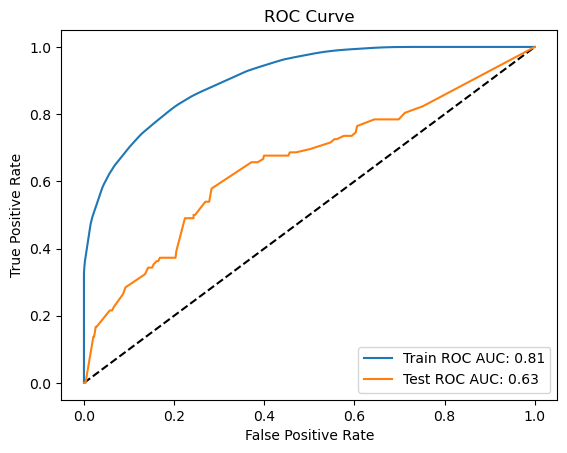


Confusion Matrix:


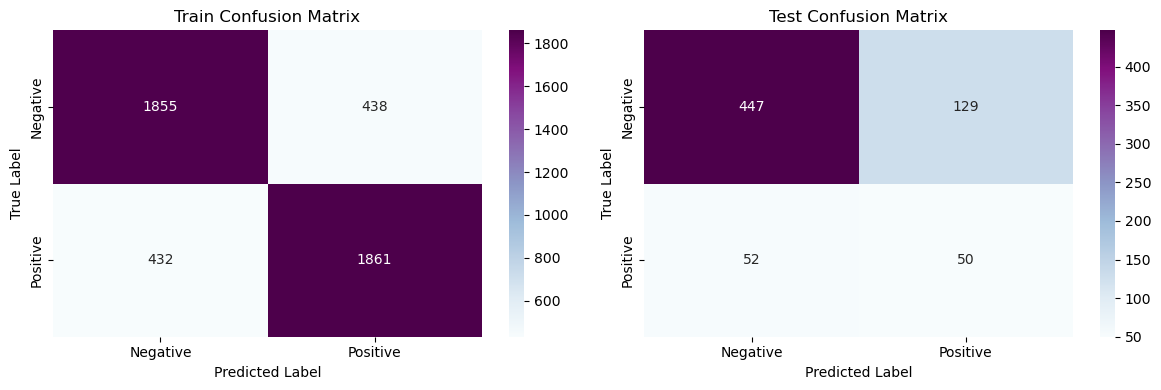


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.811106 | 0.808984 |   0.810044 | 2293        |
| 1.0          |    0.809482 | 0.811601 |   0.81054  | 2293        |
| accuracy     |    0.810292 | 0.810292 |   0.810292 |    0.810292 |
| macro avg    |    0.810294 | 0.810292 |   0.810292 | 4586        |
| weighted avg |    0.810294 | 0.810292 |   0.810292 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.895792 | 0.776042 |   0.831628 | 576        |
| 1.0          |    0.27933  | 0.490196 |   0.355872 | 102        |
| accuracy     |    0.733038 | 0.733038 |   0.733038 |   0.733038 |
| macro avg    |    0.587561 | 0.633119 |   0.59375  | 678        |
| weighted avg |    0.80305  | 0.733038 |   0.7600

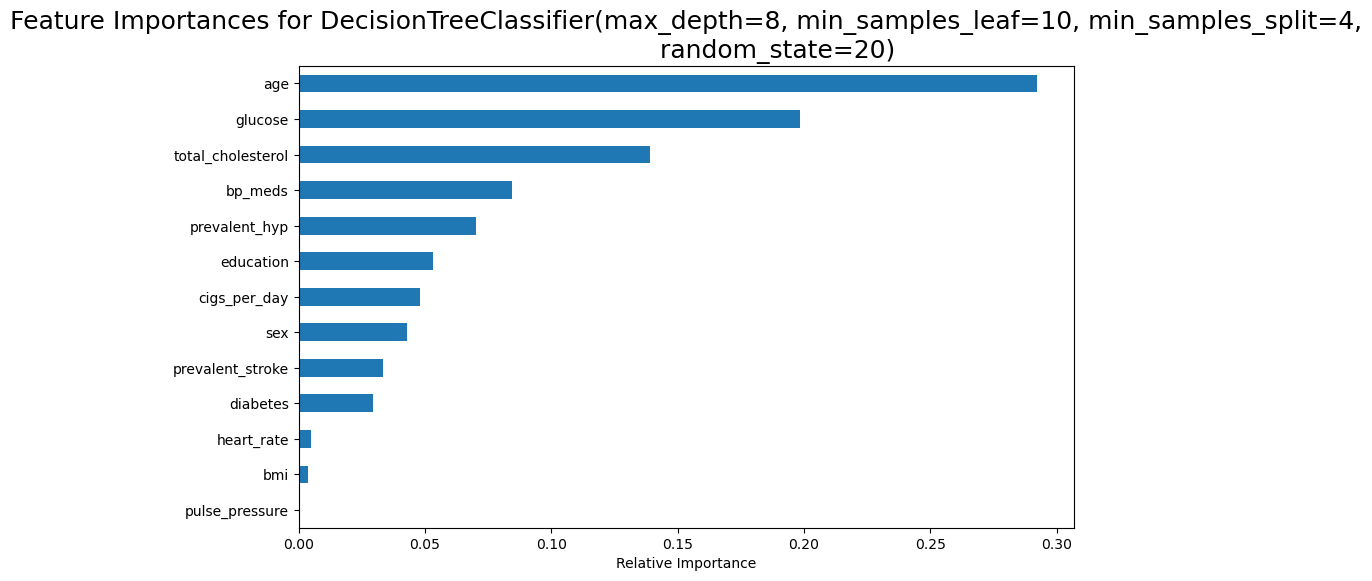

In [134]:
dt2_score = evaluate_model(dt2, X_smote, X_test, y_smote, y_test)

In [135]:
score['Decision Tree tuned'] = dt2_score


##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is GridSearchCV. GridSearchCV is a method that performs an exhaustive search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it is simple to implement and can be effective in finding good hyperparameters for a model.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. GridSearchCV can be a good choice when the parameter space is relatively small and computational resources are not a major concern.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [136]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.671298                   0.671727   
Precision Test              0.816964                   0.816964   
Recall Train                0.671173                   0.671609   
Recall Test                 0.653392                   0.653392   
Accuracy Train              0.671173                   0.671609   
Accuracy Test               0.653392                   0.653392   
ROC-AUC Train               0.671173                   0.671609   
ROC-AUC Test                0.658854                   0.658854   
F1 macro Train              0.671113                   0.671553   
F1 macro Test               0.702020                   0.702020   

                 Decision Tree  Decision Tree tuned  
Precision Train       1.000000             0.810294  
Precision Test        0.784699             0.803050  
Recall Train          1.000000             0.810292  
Recall Test           0.771386             0.733038  
Accuracy Train        1.000000             0.810292  
Accuracy Test         0.771386             0.733038  
ROC-AUC Train         1.000000             0.810292  
ROC-AUC Test          0.583078             0.633119  
F1 macro Train        1.000000             0.810292  
F1 macro Test         0.777708             0.760054

It appears that hyperparameter tuning improved the performance of the Decision Tree model on the test set.Also,the tuned model is not overfitting like the untuned model.

### ML Model - 3 : **Random Forest**

In [137]:
# ML Model - 3 Implementation
rf = RandomForestClassifier(random_state=0)


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.


Train ROC AUC: 1.0
Test ROC AUC: 0.5561172385620915


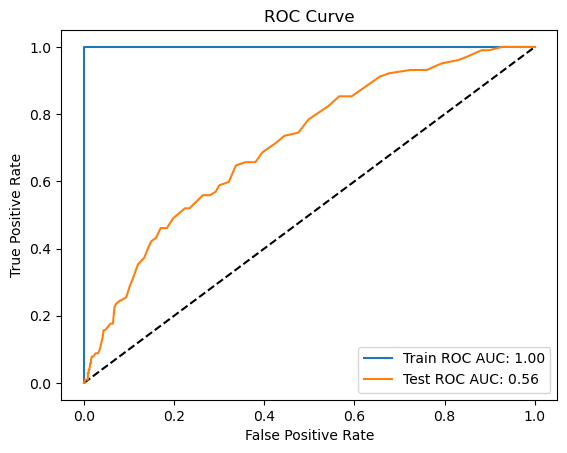


Confusion Matrix:


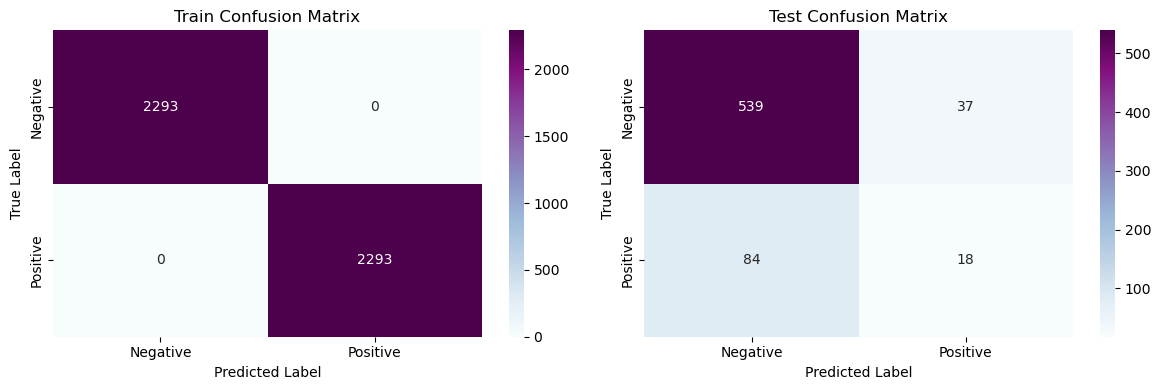


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.865169 | 0.935764 |   0.899083 | 576        |
| 1.0          |    0.327273 | 0.176471 |   0.229299 | 102        |
| accuracy     |    0.821534 | 0.821534 |   0.821534 |   0.821534 |
| macro avg    |    0.596221 | 0.556117 |   0.564191 | 678        |
| weighted avg |    0.784246 | 0.821534 |   0.798319 | 678      

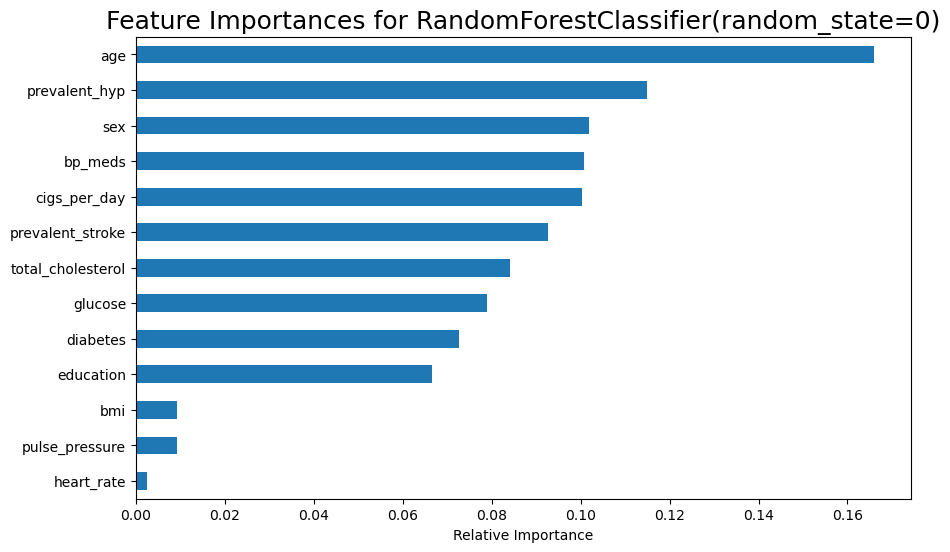

In [138]:
# Visualizing evaluation Metric Score chart
rf_score = evaluate_model(rf, X_smote, X_test, y_smote, y_test)

In [139]:
score['Random Forest'] = rf_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.671298                   0.671727   
Precision Test              0.816964                   0.816964   
Recall Train                0.671173                   0.671609   
Recall Test                 0.653392                   0.653392   
Accuracy Train              0.671173                   0.671609   
Accuracy Test               0.653392                   0.653392   
ROC-AUC Train               0.671173                   0.671609   
ROC-AUC Test                0.658854                   0.658854   
F1 macro Train              0.671113                   0.671553   
F1 macro Test               0.702020                   0.702020   

                 Decision Tree  Decision Tree tuned  Random Forest  
Precision Train       1.000000             0.810294       1.000000  
Precision Test        0.784699             0.803050       0.784246  
Recall Train          1.000000             0.810292       1.000000  
Recall Test           0.771386             0.733038       0.821534  
Accuracy Train        1.000000             0.810292       1.000000  
Accuracy Test         0.771386             0.733038       0.821534  
ROC-AUC Train         1.000000             0.810292       1.000000  
ROC-AUC Test          0.583078             0.633119       0.556117  
F1 macro Train        1.000000             0.810292       1.000000  
F1 macro Test         0.777708             0.760054       0.798319

#### 2. Cross- Validation & Hyperparameter Tuning

In [140]:
# Define the hyperparameter grid
grid = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [8, 9, 10, 11, 12,13, 14, 15],
              'min_samples_split': [2, 3, 4, 5]}

# Initialize the model
rf = RandomForestClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomSearchCV
random_search = RandomizedSearchCV(rf, grid,cv=rskf, n_iter=10, n_jobs=-1)

# Fit the GridSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 200, 'min_samples_split': 3, 'max_depth': 15}

In [141]:
# Initialize model with best parameters
rf2 = RandomForestClassifier(n_estimators = best_params['n_estimators'],
                                 min_samples_leaf= best_params['min_samples_split'],
                                 max_depth = best_params['max_depth'],
                                 random_state=0)


Train ROC AUC: 0.9795028347143481
Test ROC AUC: 0.5973243464052287


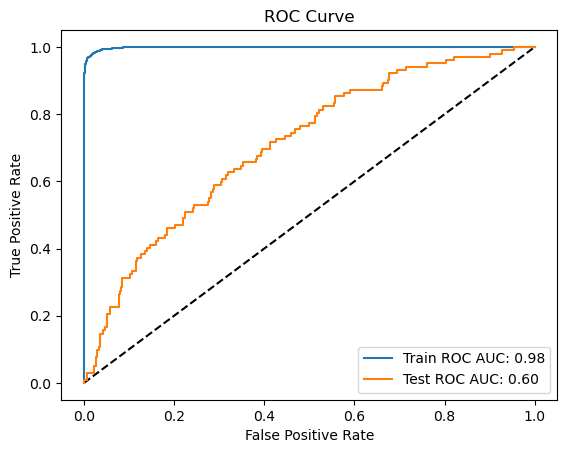


Confusion Matrix:


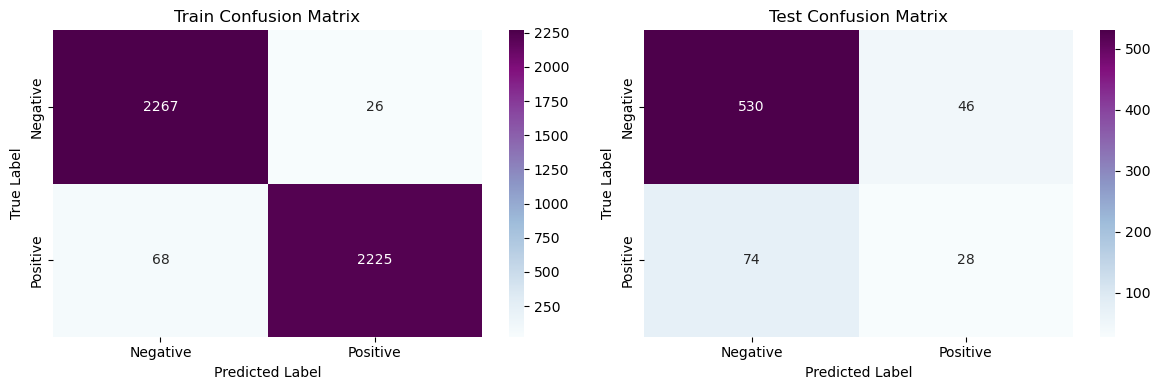


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.970878 | 0.988661 |   0.979689 | 2293        |
| 1.0          |    0.98845  | 0.970345 |   0.979313 | 2293        |
| accuracy     |    0.979503 | 0.979503 |   0.979503 |    0.979503 |
| macro avg    |    0.979664 | 0.979503 |   0.979501 | 4586        |
| weighted avg |    0.979664 | 0.979503 |   0.979501 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.877483 | 0.920139 |   0.898305 | 576        |
| 1.0          |    0.378378 | 0.27451  |   0.318182 | 102        |
| accuracy     |    0.823009 | 0.823009 |   0.823009 |   0.823009 |
| macro avg    |    0.627931 | 0.597324 |   0.608243 | 678        |
| weighted avg |    0.802397 | 0.823009 |   0.8110

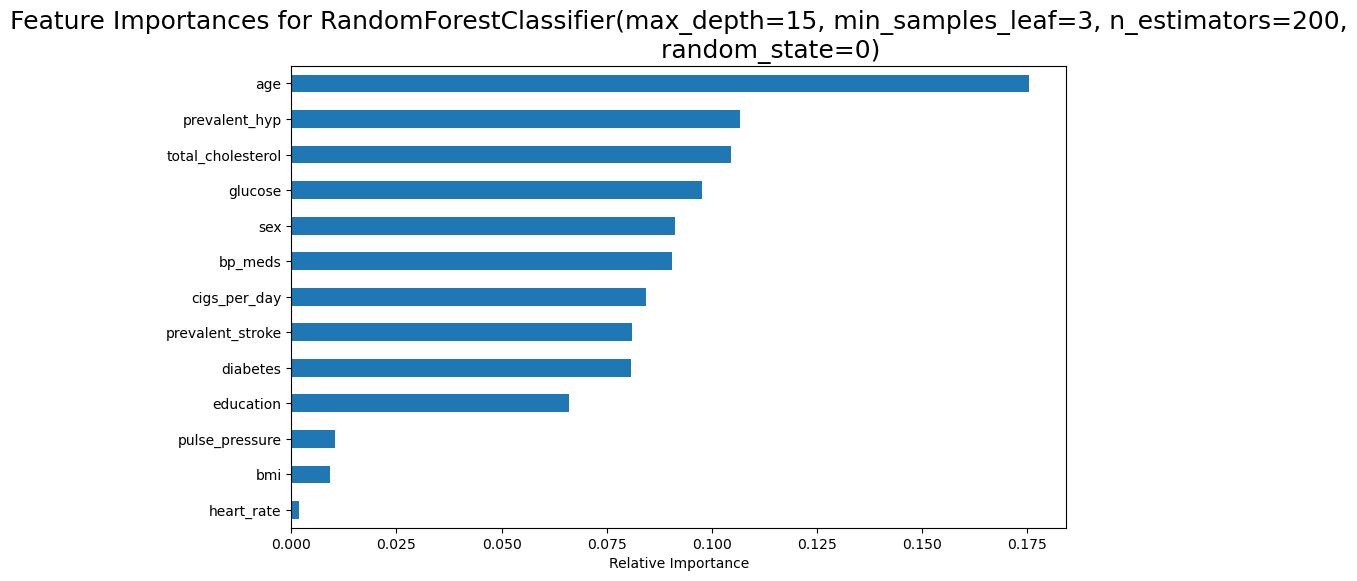

In [142]:
# Visualizing evaluation Metric Score chart
rf2_score = evaluate_model(rf2, X_smote, X_test, y_smote, y_test)

In [143]:
score['Random Forest tuned'] = rf2_score

##### Which hyperparameter optimization technique have you used and why?

The hyperparameter optimization technique used is RandomizedSearchCV. RandomizedSearchCV is a method that performs a random search over a specified parameter grid to find the best hyperparameters for a model. It is a popular method for hyperparameter tuning because it can be more efficient than exhaustive search methods like GridSearchCV when the parameter space is large.

The choice of hyperparameter optimization technique depends on various factors such as the size of the parameter space, the computational resources available, and the time constraints. RandomizedSearchCV can be a good choice when the parameter space is large and computational resources are limited.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [144]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.671298                   0.671727   
Precision Test              0.816964                   0.816964   
Recall Train                0.671173                   0.671609   
Recall Test                 0.653392                   0.653392   
Accuracy Train              0.671173                   0.671609   
Accuracy Test               0.653392                   0.653392   
ROC-AUC Train               0.671173                   0.671609   
ROC-AUC Test                0.658854                   0.658854   
F1 macro Train              0.671113                   0.671553   
F1 macro Test               0.702020                   0.702020   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.810294       1.000000   
Precision Test        0.784699             0.803050       0.784246   
Recall Train          1.000000             0.810292       1.000000   
Recall Test           0.771386             0.733038       0.821534   
Accuracy Train        1.000000             0.810292       1.000000   
Accuracy Test         0.771386             0.733038       0.821534   
ROC-AUC Train         1.000000             0.810292       1.000000   
ROC-AUC Test          0.583078             0.633119       0.556117   
F1 macro Train        1.000000             0.810292       1.000000   
F1 macro Test         0.777708             0.760054       0.798319   

                 Random Forest tuned  
Precision Train             0.979664  
Precision Test              0.802397  
Recall Train                0.979503  
Recall Test                 0.823009  
Accuracy Train              0.979503  
Accuracy Test               0.823009  
ROC-AUC Train               0.979503  
ROC-AUC Test                0.597324  
F1 macro Train              0.979501  
F1 macro Test               0.811030

The performance of tuned Random Forest on test set is approximately same as that of untuned ones.

### ML Model-4 : **Xtreme Gradient Boosting**

In [145]:
# Initialize the model
xgb_model = xgb.XGBClassifier()


Train ROC AUC: 0.9967291757522896
Test ROC AUC: 0.5442708333333334


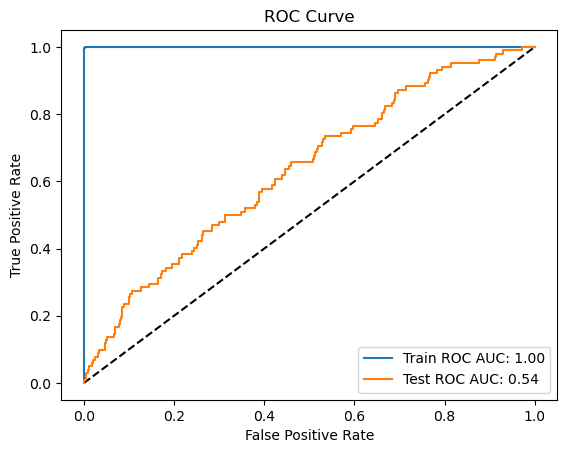


Confusion Matrix:


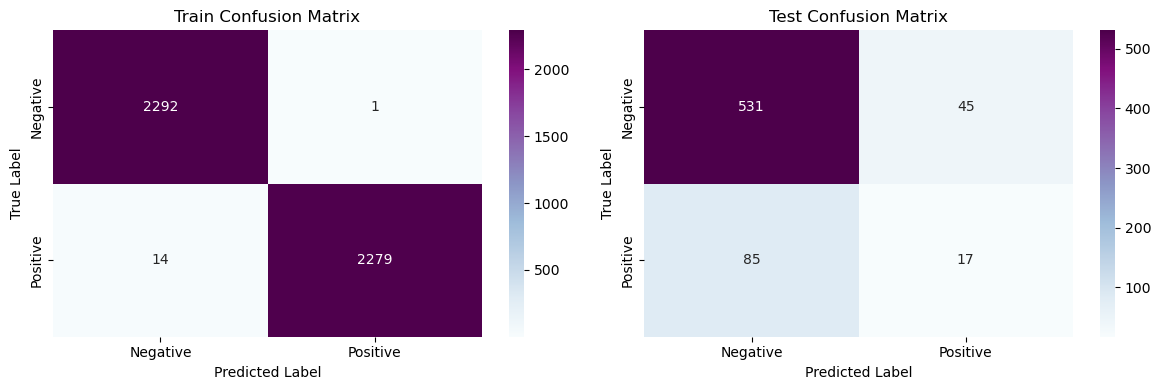


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.993929 | 0.999564 |   0.996738 | 2293        |
| 1.0          |    0.999561 | 0.993894 |   0.99672  | 2293        |
| accuracy     |    0.996729 | 0.996729 |   0.996729 |    0.996729 |
| macro avg    |    0.996745 | 0.996729 |   0.996729 | 4586        |
| weighted avg |    0.996745 | 0.996729 |   0.996729 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |    0.862013 | 0.921875 |   0.89094  | 576       |
| 1.0          |    0.274194 | 0.166667 |   0.207317 | 102       |
| accuracy     |    0.80826  | 0.80826  |   0.80826  |   0.80826 |
| macro avg    |    0.568103 | 0.544271 |   0.549128 | 678       |
| weighted avg |    0.77358  | 0.80826  |   0.788094 | 6

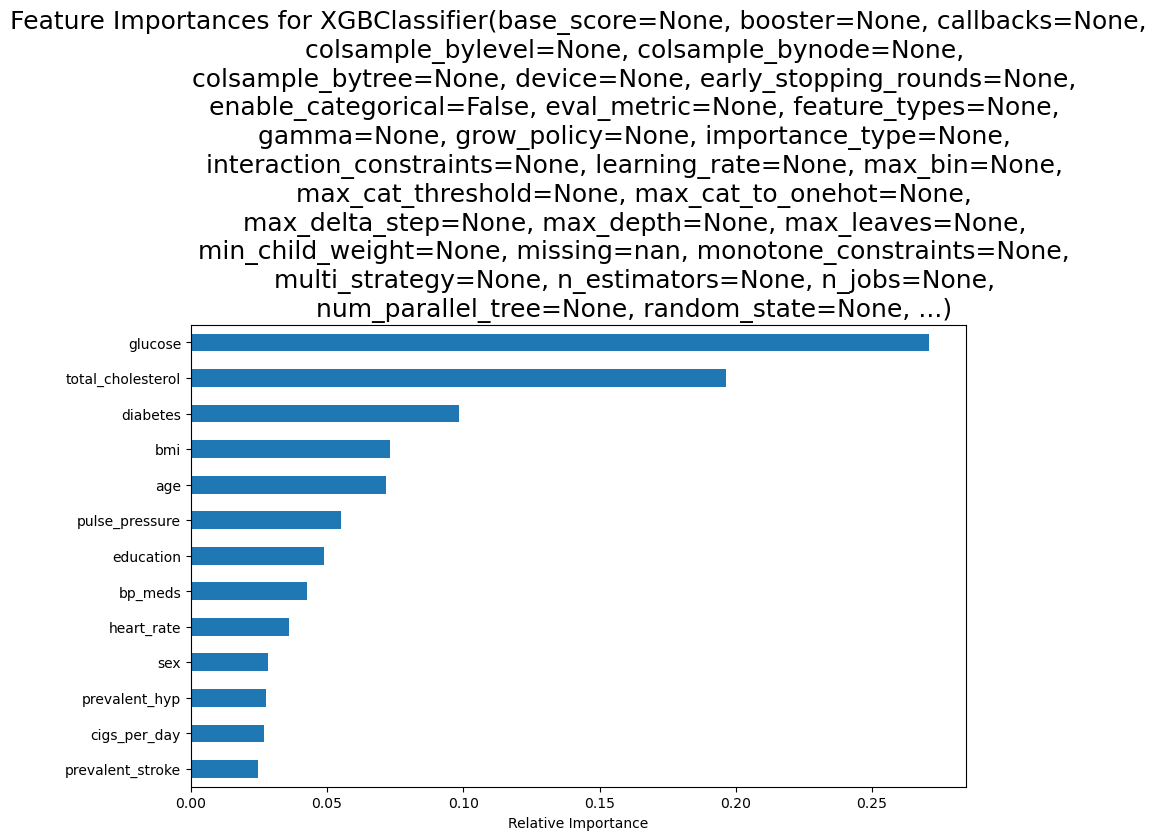

In [146]:
# Visualizing evaluation Metric Score chart
xgb_score = evaluate_model(xgb_model, X_smote, X_test, y_smote, y_test)

In [147]:
score['XGB'] = xgb_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.671298                   0.671727   
Precision Test              0.816964                   0.816964   
Recall Train                0.671173                   0.671609   
Recall Test                 0.653392                   0.653392   
Accuracy Train              0.671173                   0.671609   
Accuracy Test               0.653392                   0.653392   
ROC-AUC Train               0.671173                   0.671609   
ROC-AUC Test                0.658854                   0.658854   
F1 macro Train              0.671113                   0.671553   
F1 macro Test               0.702020                   0.702020   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.810294       1.000000   
Precision Test        0.784699             0.803050       0.784246   
Recall Train          1.000000             0.810292       1.000000   
Recall Test           0.771386             0.733038       0.821534   
Accuracy Train        1.000000             0.810292       1.000000   
Accuracy Test         0.771386             0.733038       0.821534   
ROC-AUC Train         1.000000             0.810292       1.000000   
ROC-AUC Test          0.583078             0.633119       0.556117   
F1 macro Train        1.000000             0.810292       1.000000   
F1 macro Test         0.777708             0.760054       0.798319   

                 Random Forest tuned       XGB  
Precision Train             0.979664  0.996745  
Precision Test              0.802397  0.773580  
Recall Train                0.979503  0.996729  
Recall Test                 0.823009  0.808260  
Accuracy Train              0.979503  0.996729  
Accuracy Test               0.823009  0.808260  
ROC-AUC Train               0.979503  0.996729  
ROC-AUC Test                0.597324  0.544271  
F1 macro Train              0.979501  0.996729  
F1 macro Test               0.811030  0.788094

**Cross- Validation & Hyperparameter Tuning**

In [148]:
# Define the hyperparameter grid
param_grid = {'learning_rate': np.arange(0.01, 0.3, 0.01),
              'max_depth': np.arange(3, 15, 1),
              'n_estimators': np.arange(100, 200, 10)}

# Initialize the model
xgb2_model = xgb.XGBClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(xgb2_model, param_grid, n_iter=10, cv=rskf)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'n_estimators': 180, 'max_depth': 13, 'learning_rate': 0.09}

In [149]:
# Initialize model with best parameters
xgb2_model = xgb.XGBClassifier(learning_rate = best_params['learning_rate'],
                                 max_depth = best_params['max_depth'],
                               n_estimators = best_params['n_estimators'],
                                 random_state=0)


Train ROC AUC: 1.0
Test ROC AUC: 0.5797589869281046


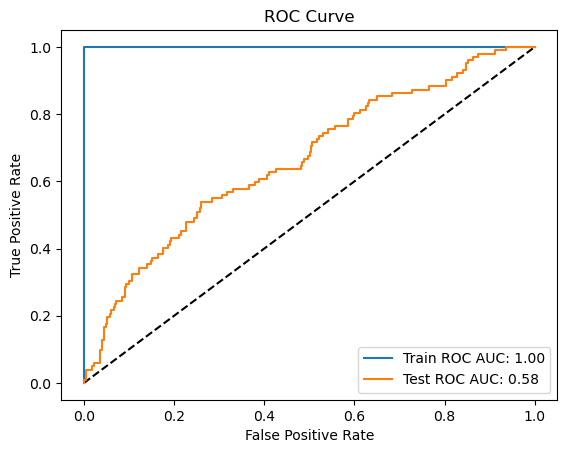


Confusion Matrix:


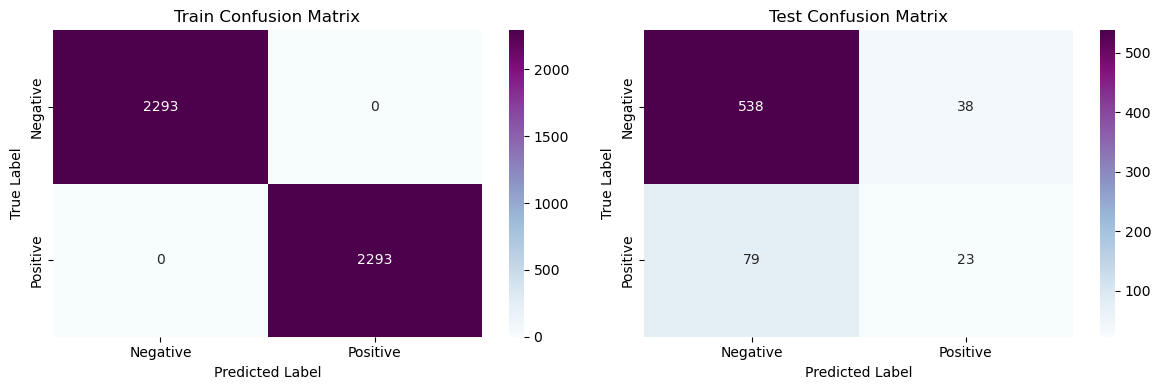


Train Classification Report:
|              |   precision |   recall |   f1-score |   support |
|:-------------|------------:|---------:|-----------:|----------:|
| 0.0          |           1 |        1 |          1 |      2293 |
| 1.0          |           1 |        1 |          1 |      2293 |
| accuracy     |           1 |        1 |          1 |         1 |
| macro avg    |           1 |        1 |          1 |      4586 |
| weighted avg |           1 |        1 |          1 |      4586 |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.871961 | 0.934028 |   0.901928 | 576        |
| 1.0          |    0.377049 | 0.22549  |   0.282209 | 102        |
| accuracy     |    0.827434 | 0.827434 |   0.827434 |   0.827434 |
| macro avg    |    0.624505 | 0.579759 |   0.592068 | 678        |
| weighted avg |    0.797505 | 0.827434 |   0.808696 | 678      

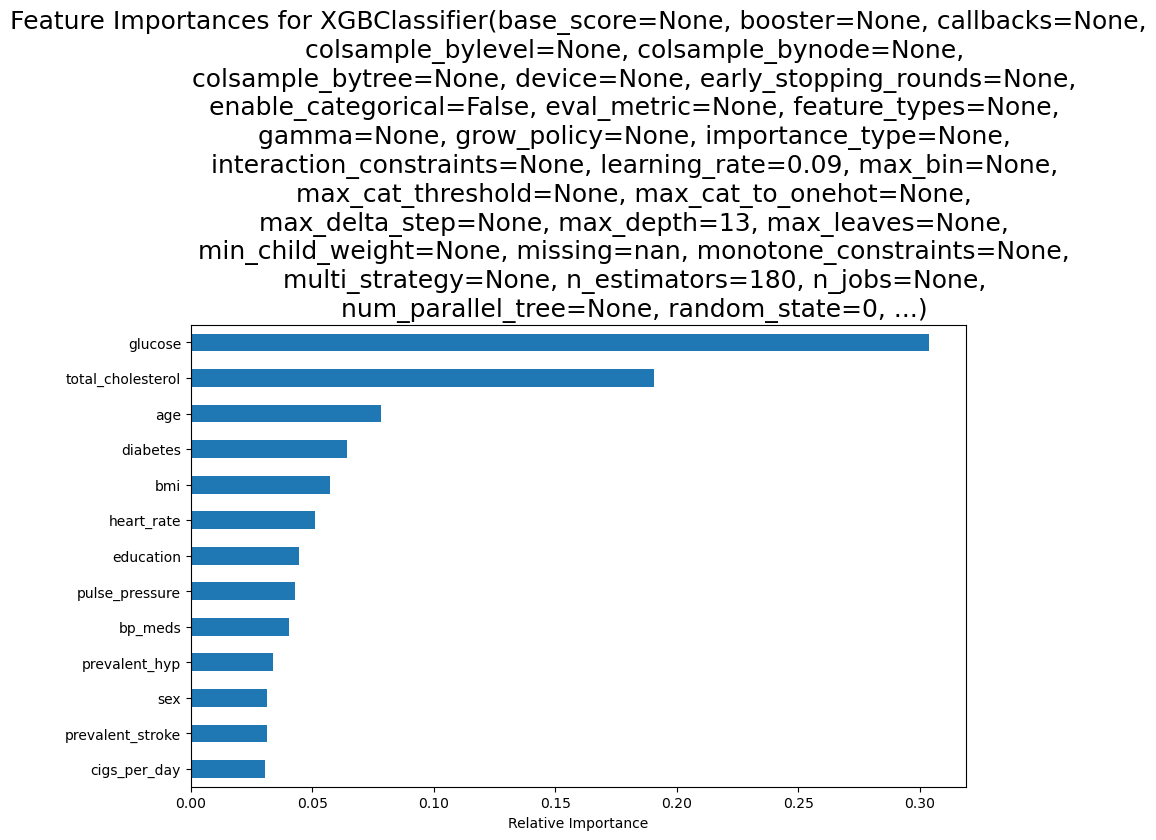

In [150]:
# Visualizing evaluation Metric Score chart
xgb2_score = evaluate_model(xgb2_model, X_smote, X_test, y_smote, y_test)

In [151]:
score['XGB tuned'] = xgb2_score

**Which hyperparameter optimization technique have you used and why?**

Here we have used Randomized search to tune the XGB model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

In [152]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.671298                   0.671727   
Precision Test              0.816964                   0.816964   
Recall Train                0.671173                   0.671609   
Recall Test                 0.653392                   0.653392   
Accuracy Train              0.671173                   0.671609   
Accuracy Test               0.653392                   0.653392   
ROC-AUC Train               0.671173                   0.671609   
ROC-AUC Test                0.658854                   0.658854   
F1 macro Train              0.671113                   0.671553   
F1 macro Test               0.702020                   0.702020   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.810294       1.000000   
Precision Test        0.784699             0.803050       0.784246   
Recall Train          1.000000             0.810292       1.000000   
Recall Test           0.771386             0.733038       0.821534   
Accuracy Train        1.000000             0.810292       1.000000   
Accuracy Test         0.771386             0.733038       0.821534   
ROC-AUC Train         1.000000             0.810292       1.000000   
ROC-AUC Test          0.583078             0.633119       0.556117   
F1 macro Train        1.000000             0.810292       1.000000   
F1 macro Test         0.777708             0.760054       0.798319   

                 Random Forest tuned       XGB  XGB tuned  
Precision Train             0.979664  0.996745   1.000000  
Precision Test              0.802397  0.773580   0.797505  
Recall Train                0.979503  0.996729   1.000000  
Recall Test                 0.823009  0.808260   0.827434  
Accuracy Train              0.979503  0.996729   1.000000  
Accuracy Test               0.823009  0.808260   0.827434  
ROC-AUC Train               0.979503  0.996729   1.000000  
ROC-AUC Test                0.597324  0.544271   0.579759  
F1 macro Train              0.979501  0.996729   1.000000  
F1 macro Test               0.811030  0.788094   0.808696

It appears that hyperparameter tuning did not improve the performance of the XG Boost model on the test set.

### ML Model - 5 : Neural Network

In [153]:
# Initiate model
neural = MLPClassifier(random_state=6)


Train ROC AUC: 0.8610989969472307
Test ROC AUC: 0.6308721405228758


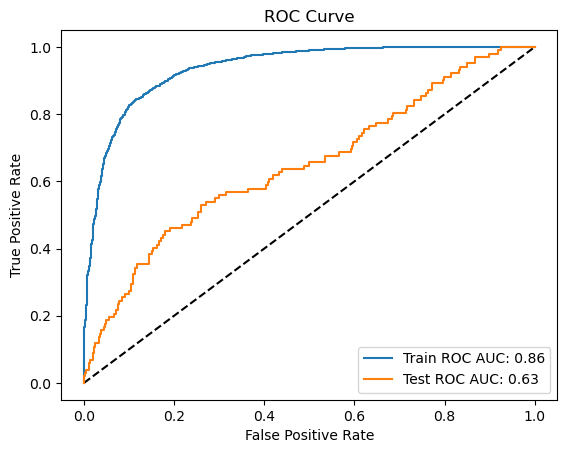


Confusion Matrix:


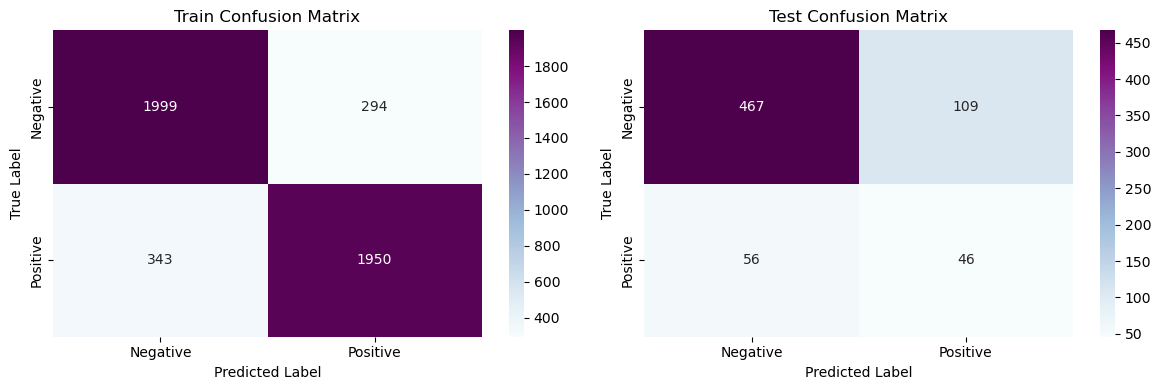


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.853544 | 0.871784 |   0.862567 | 2293        |
| 1.0          |    0.868984 | 0.850414 |   0.859599 | 2293        |
| accuracy     |    0.861099 | 0.861099 |   0.861099 |    0.861099 |
| macro avg    |    0.861264 | 0.861099 |   0.861083 | 4586        |
| weighted avg |    0.861264 | 0.861099 |   0.861083 | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.892925 | 0.810764 |   0.849864 | 576        |
| 1.0          |    0.296774 | 0.45098  |   0.357977 | 102        |
| accuracy     |    0.756637 | 0.756637 |   0.756637 |   0.756637 |
| macro avg    |    0.59485  | 0.630872 |   0.60392  | 678        |
| weighted avg |    0.803239 | 0.756637 |   0.7758

In [154]:
# Visualizing evaluation Metric Score chart
neural_score = evaluate_model(neural, X_smote, X_test, y_smote, y_test)

In [155]:
score['Neural Network'] = neural_score
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.671298                   0.671727   
Precision Test              0.816964                   0.816964   
Recall Train                0.671173                   0.671609   
Recall Test                 0.653392                   0.653392   
Accuracy Train              0.671173                   0.671609   
Accuracy Test               0.653392                   0.653392   
ROC-AUC Train               0.671173                   0.671609   
ROC-AUC Test                0.658854                   0.658854   
F1 macro Train              0.671113                   0.671553   
F1 macro Test               0.702020                   0.702020   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.810294       1.000000   
Precision Test        0.784699             0.803050       0.784246   
Recall Train          1.000000             0.810292       1.000000   
Recall Test           0.771386             0.733038       0.821534   
Accuracy Train        1.000000             0.810292       1.000000   
Accuracy Test         0.771386             0.733038       0.821534   
ROC-AUC Train         1.000000             0.810292       1.000000   
ROC-AUC Test          0.583078             0.633119       0.556117   
F1 macro Train        1.000000             0.810292       1.000000   
F1 macro Test         0.777708             0.760054       0.798319   

                 Random Forest tuned       XGB  XGB tuned  Neural Network  
Precision Train             0.979664  0.996745   1.000000        0.861264  
Precision Test              0.802397  0.773580   0.797505        0.803239  
Recall Train                0.979503  0.996729   1.000000        0.861099  
Recall Test                 0.823009  0.808260   0.827434        0.756637  
Accuracy Train              0.979503  0.996729   1.000000        0.861099  
Accuracy Test               0.823009  0.808260   0.827434        0.756637  
ROC-AUC Train               0.979503  0.996729   1.000000        0.861099  
ROC-AUC Test                0.597324  0.544271   0.579759        0.630872  
F1 macro Train              0.979501  0.996729   1.000000        0.861083  
F1 macro Test               0.811030  0.788094   0.808696        0.775863

**Cross- Validation & Hyperparameter Tuning**

In [156]:
# Define the hyperparameter grid
param_grid = {'hidden_layer_sizes': np.arange(10, 100, 10),
              'alpha': np.arange(0.0001, 0.01, 0.0001)}
# Initialize the model
neural = MLPClassifier(random_state=0)

# repeated stratified kfold
rskf = RepeatedStratifiedKFold(n_splits=3, n_repeats=3, random_state=0)

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(neural, param_grid, n_iter=10, cv=rskf, n_jobs=-1)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_smote, y_smote)

# Select the best hyperparameters
best_params = random_search.best_params_
best_params

{'hidden_layer_sizes': 90, 'alpha': 0.0085}

In [157]:
# Initiate model with best parameters
neural2 = MLPClassifier(hidden_layer_sizes = best_params['hidden_layer_sizes'],
                        alpha = best_params['alpha'],
                        random_state = 0)


Train ROC AUC: 0.8700392498909726
Test ROC AUC: 0.6175449346405228


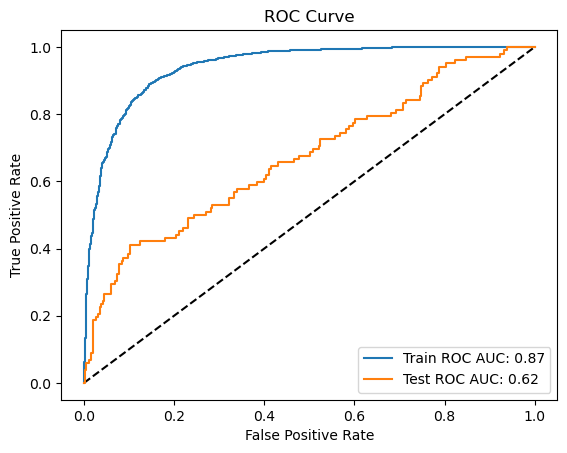


Confusion Matrix:


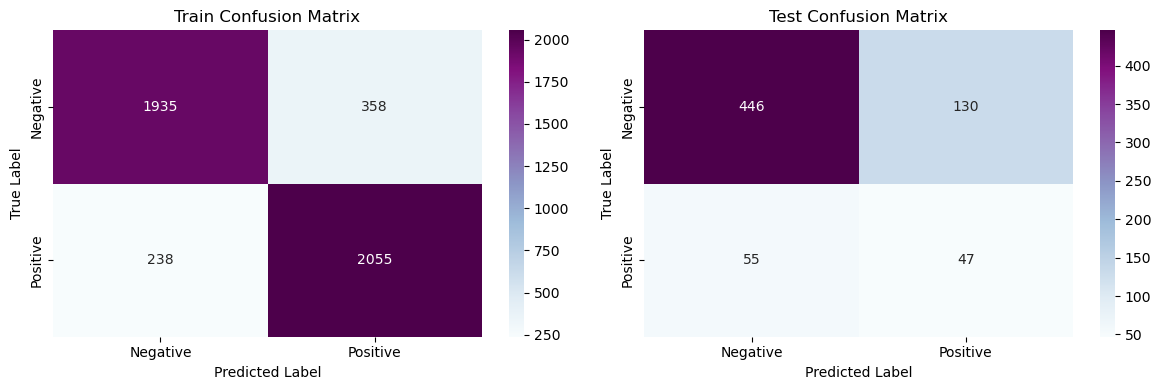


Train Classification Report:
|              |   precision |   recall |   f1-score |     support |
|:-------------|------------:|---------:|-----------:|------------:|
| 0.0          |    0.890474 | 0.843873 |   0.866547 | 2293        |
| 1.0          |    0.851637 | 0.896206 |   0.873353 | 2293        |
| accuracy     |    0.870039 | 0.870039 |   0.870039 |    0.870039 |
| macro avg    |    0.871055 | 0.870039 |   0.86995  | 4586        |
| weighted avg |    0.871055 | 0.870039 |   0.86995  | 4586        |

Test Classification Report:
|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0.0          |    0.89022  | 0.774306 |   0.828227 | 576        |
| 1.0          |    0.265537 | 0.460784 |   0.336918 | 102        |
| accuracy     |    0.727139 | 0.727139 |   0.727139 |   0.727139 |
| macro avg    |    0.577878 | 0.617545 |   0.582572 | 678        |
| weighted avg |    0.796241 | 0.727139 |   0.7543

In [158]:
# Visualizing evaluation Metric Score chart
neural2_score = evaluate_model(neural2, X_smote, X_test, y_smote, y_test)

In [159]:
score['Neural Network tuned']=neural2_score

**Which hyperparameter optimization technique have you used and why?**

Here we have used Randomized search to tune the Neural Network model.

Randomized search is a popular technique because it can be more efficient than exhaustive search methods like grid search. Instead of trying all possible combinations of hyperparameters, randomized search samples a random subset of the hyperparameter space. This can save time and computational resources while still finding good hyperparameters for the model.

In [160]:
score

Logistic regression  Logistic regression tuned  \
Precision Train             0.671298                   0.671727   
Precision Test              0.816964                   0.816964   
Recall Train                0.671173                   0.671609   
Recall Test                 0.653392                   0.653392   
Accuracy Train              0.671173                   0.671609   
Accuracy Test               0.653392                   0.653392   
ROC-AUC Train               0.671173                   0.671609   
ROC-AUC Test                0.658854                   0.658854   
F1 macro Train              0.671113                   0.671553   
F1 macro Test               0.702020                   0.702020   

                 Decision Tree  Decision Tree tuned  Random Forest  \
Precision Train       1.000000             0.810294       1.000000   
Precision Test        0.784699             0.803050       0.784246   
Recall Train          1.000000             0.810292       1.000000   
Recall Test           0.771386             0.733038       0.821534   
Accuracy Train        1.000000             0.810292       1.000000   
Accuracy Test         0.771386             0.733038       0.821534   
ROC-AUC Train         1.000000             0.810292       1.000000   
ROC-AUC Test          0.583078             0.633119       0.556117   
F1 macro Train        1.000000             0.810292       1.000000   
F1 macro Test         0.777708             0.760054       0.798319   

                 Random Forest tuned       XGB  XGB tuned  Neural Network  \
Precision Train             0.979664  0.996745   1.000000        0.861264   
Precision Test              0.802397  0.773580   0.797505        0.803239   
Recall Train                0.979503  0.996729   1.000000        0.861099   
Recall Test                 0.823009  0.808260   0.827434        0.756637   
Accuracy Train              0.979503  0.996729   1.000000        0.861099   
Accuracy Test               0.823009  0.808260   0.827434        0.756637   
ROC-AUC Train               0.979503  0.996729   1.000000        0.861099   
ROC-AUC Test                0.597324  0.544271   0.579759        0.630872   
F1 macro Train              0.979501  0.996729   1.000000        0.861083   
F1 macro Test               0.811030  0.788094   0.808696        0.775863   

                 Neural Network tuned  
Precision Train              0.871055  
Precision Test               0.796241  
Recall Train                 0.870039  
Recall Test                  0.727139  
Accuracy Train               0.870039  
Accuracy Test                0.727139  
ROC-AUC Train                0.870039  
ROC-AUC Test                 0.617545  
F1 macro Train               0.869950  
F1 macro Test                0.754313

In [161]:
print(score.to_markdown())

|                 |   Logistic regression |   Logistic regression tuned |   Decision Tree |   Decision Tree tuned |   Random Forest |   Random Forest tuned |      XGB |   XGB tuned |   Neural Network |   Neural Network tuned |
|:----------------|----------------------:|----------------------------:|----------------:|----------------------:|----------------:|----------------------:|---------:|------------:|-----------------:|-----------------------:|
| Precision Train |              0.671298 |                    0.671727 |        1        |              0.810294 |        1        |              0.979664 | 0.996745 |    1        |         0.861264 |               0.871055 |
| Precision Test  |              0.816964 |                    0.816964 |        0.784699 |              0.80305  |        0.784246 |              0.802397 | 0.77358  |    0.797505 |         0.803239 |               0.796241 |
| Recall Train    |              0.671173 |                    0.671609 |        1        | 

### **Plot of Scores for models**

### **Precision**

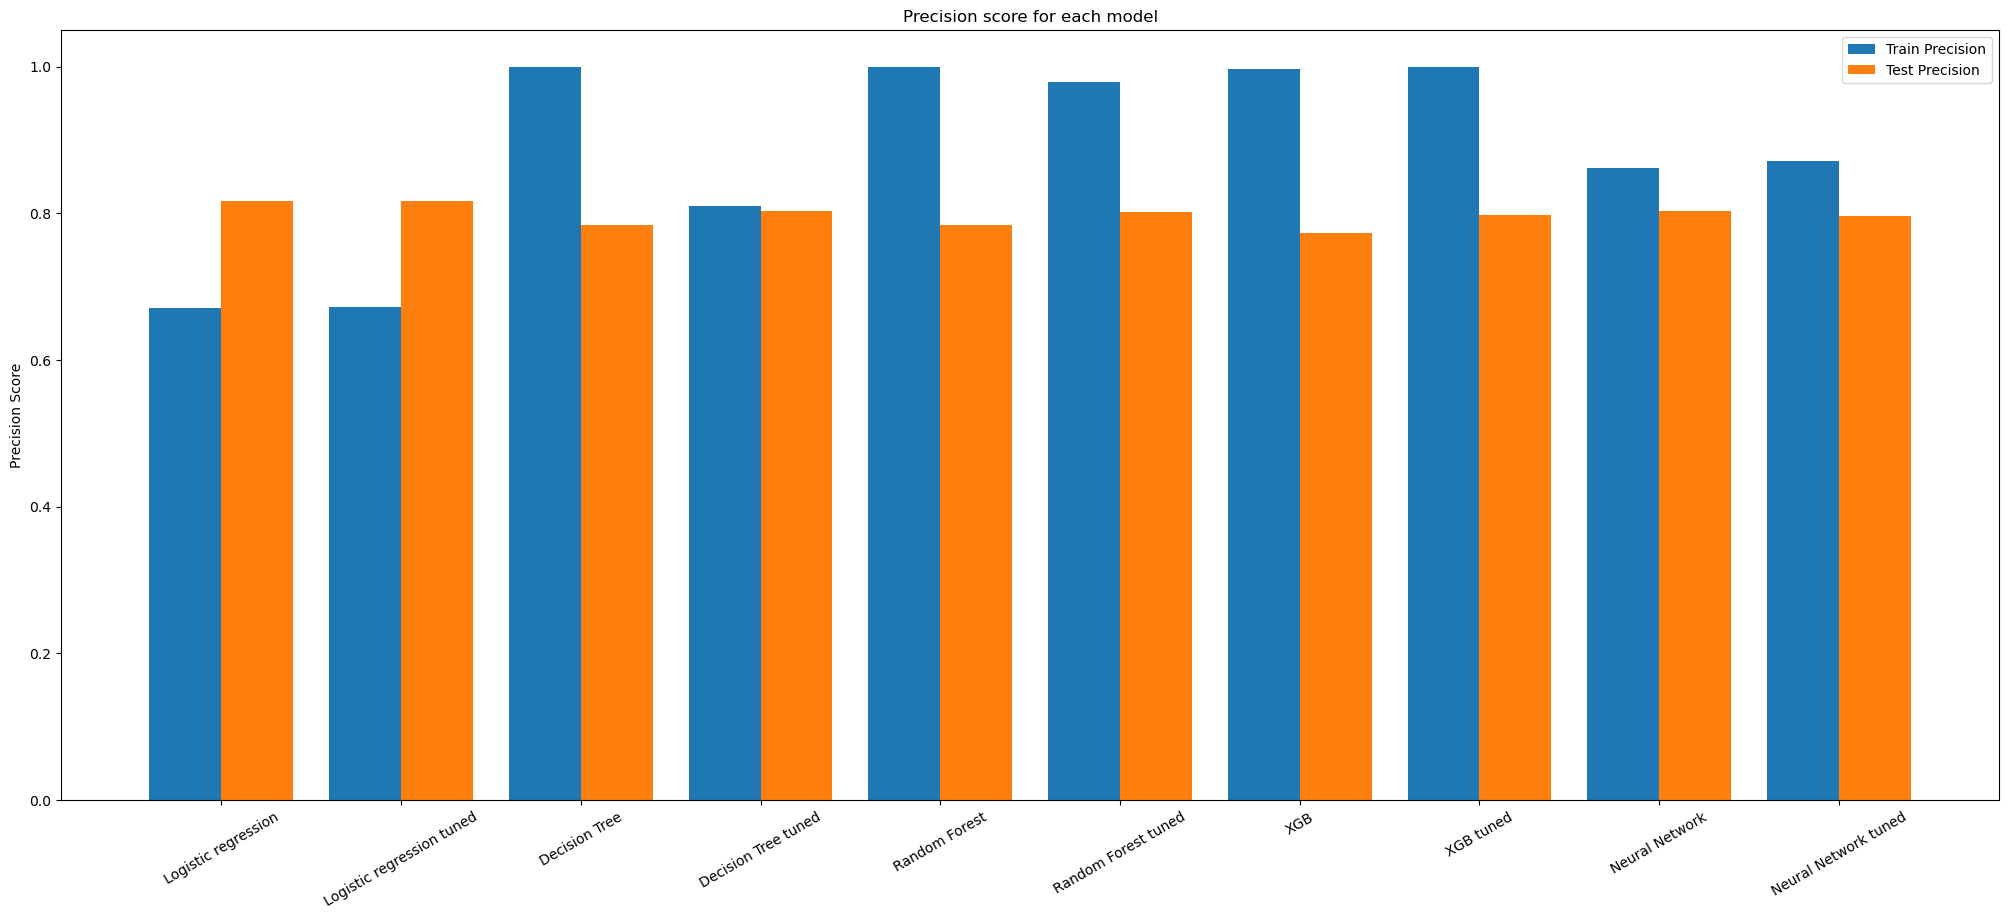

In [162]:
models = list(score.columns)
train = score.iloc[0,:]
test = score.iloc[1,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,10))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Precision')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Precision')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Precision Score")
plt.title("Precision score for each model")
plt.legend()
plt.show()

### **Recall**

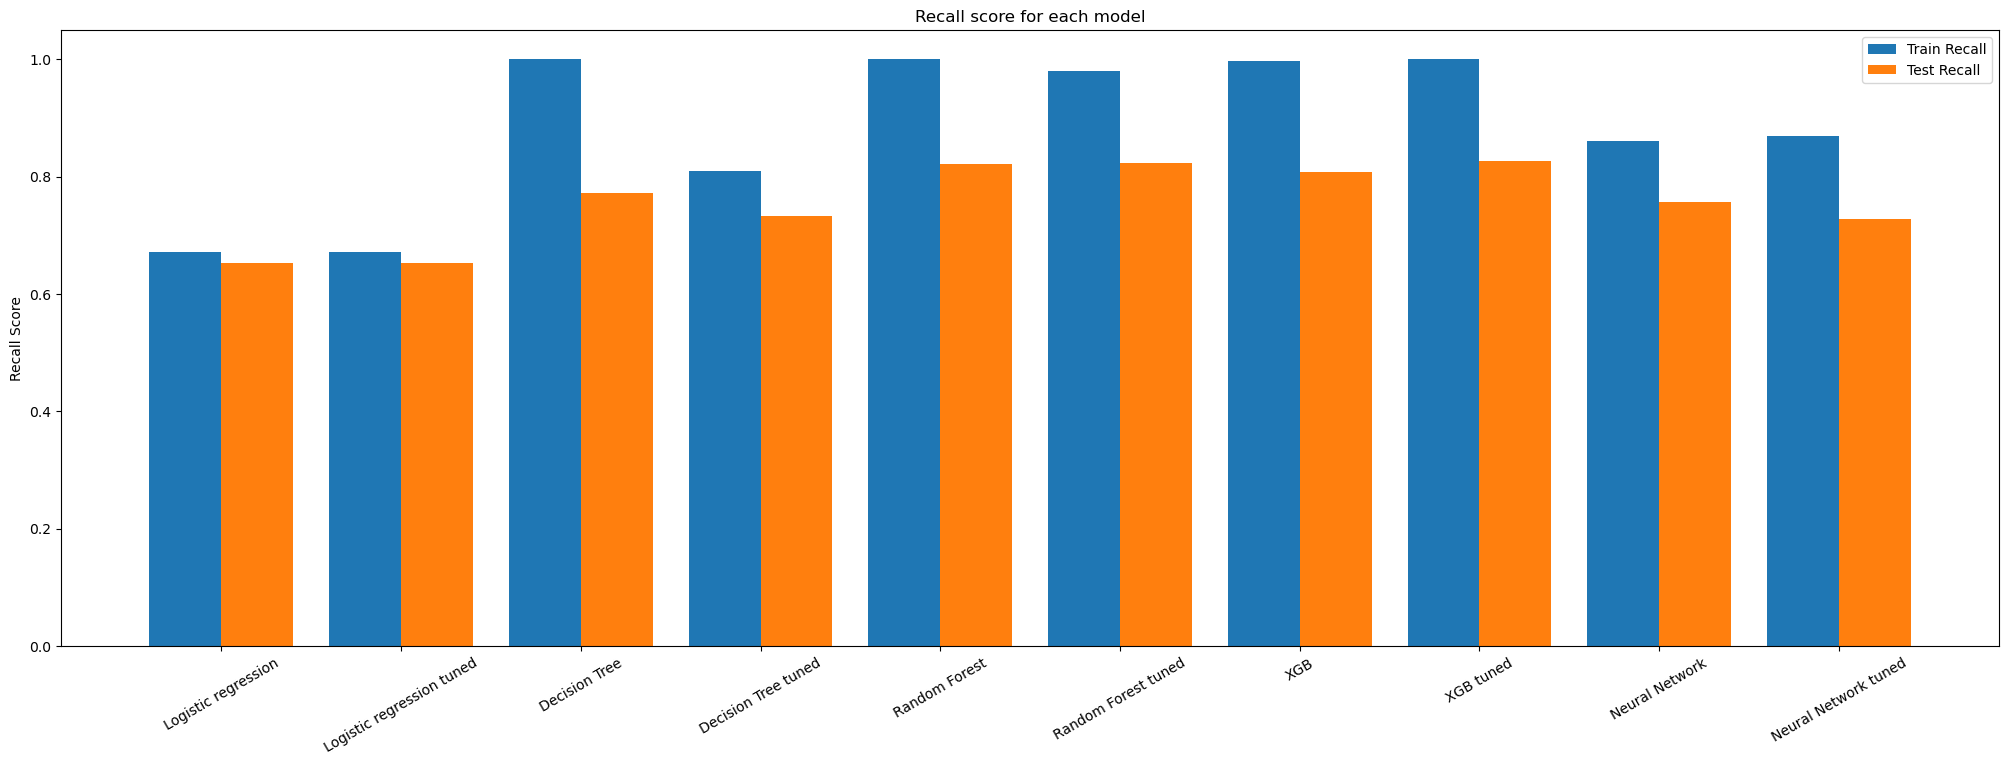

In [163]:
models = list(score.columns)
train = score.iloc[2,:]
test = score.iloc[3,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Recall')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Recall')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Recall Score")
plt.title("Recall score for each model")
plt.legend()
plt.show()

### **Accuracy**

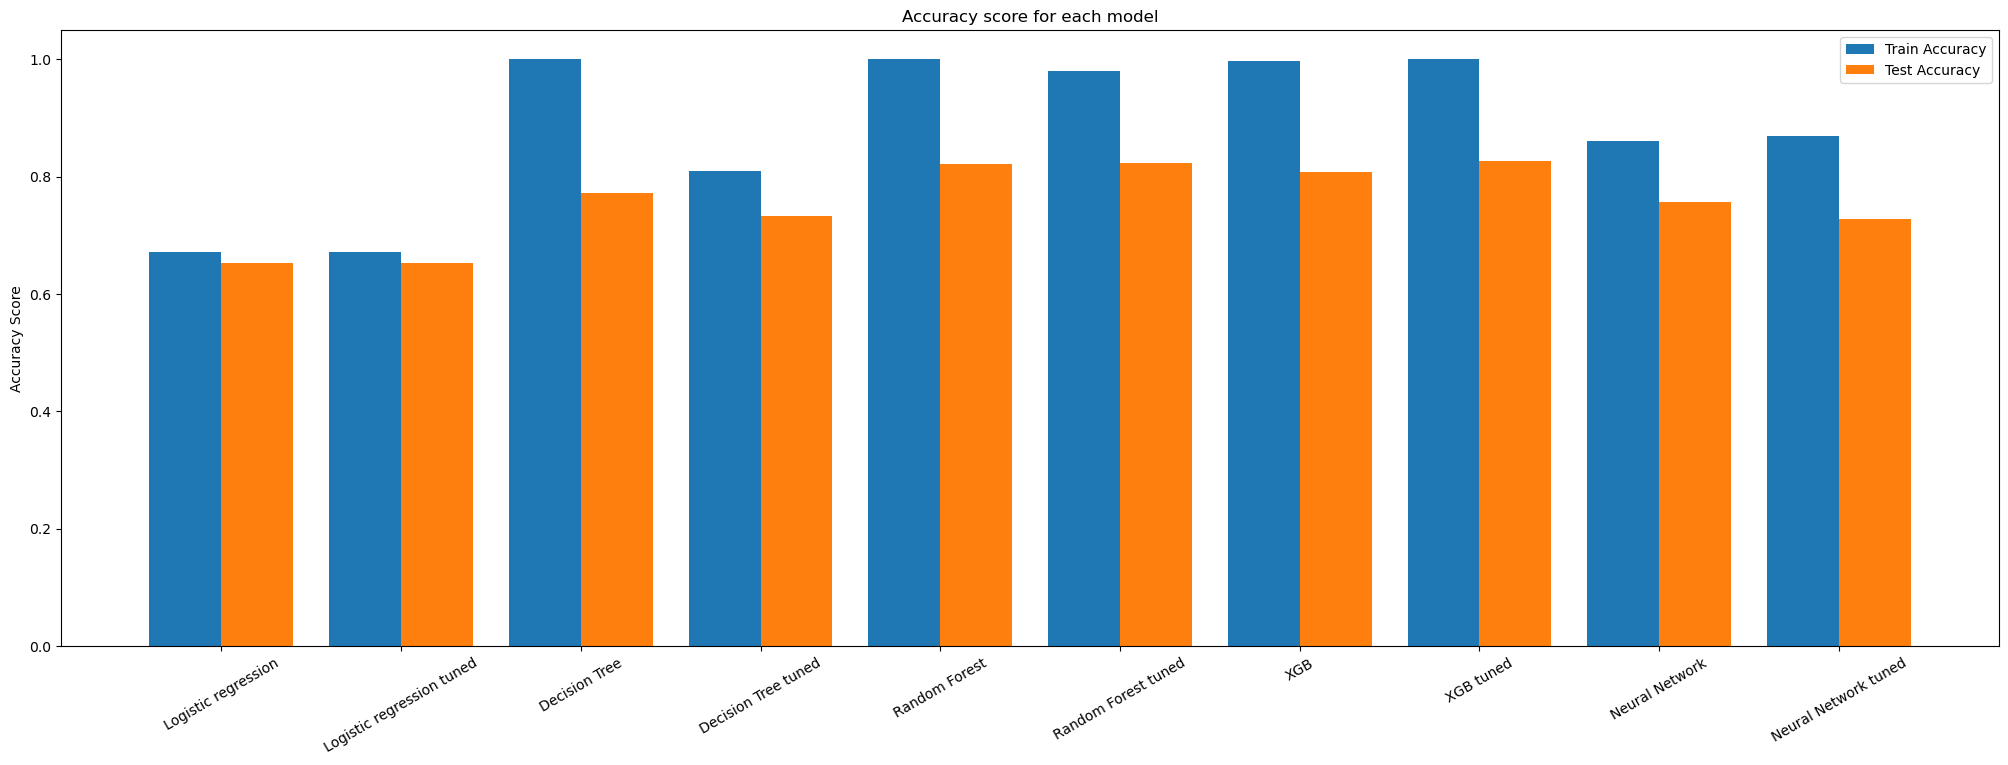

In [164]:
models = list(score.columns)
train = score.iloc[4,:]
test = score.iloc[5,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train Accuracy')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test Accuracy')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("Accuracy Score")
plt.title("Accuracy score for each model")
plt.legend()
plt.show()

### **ROC-AUC**

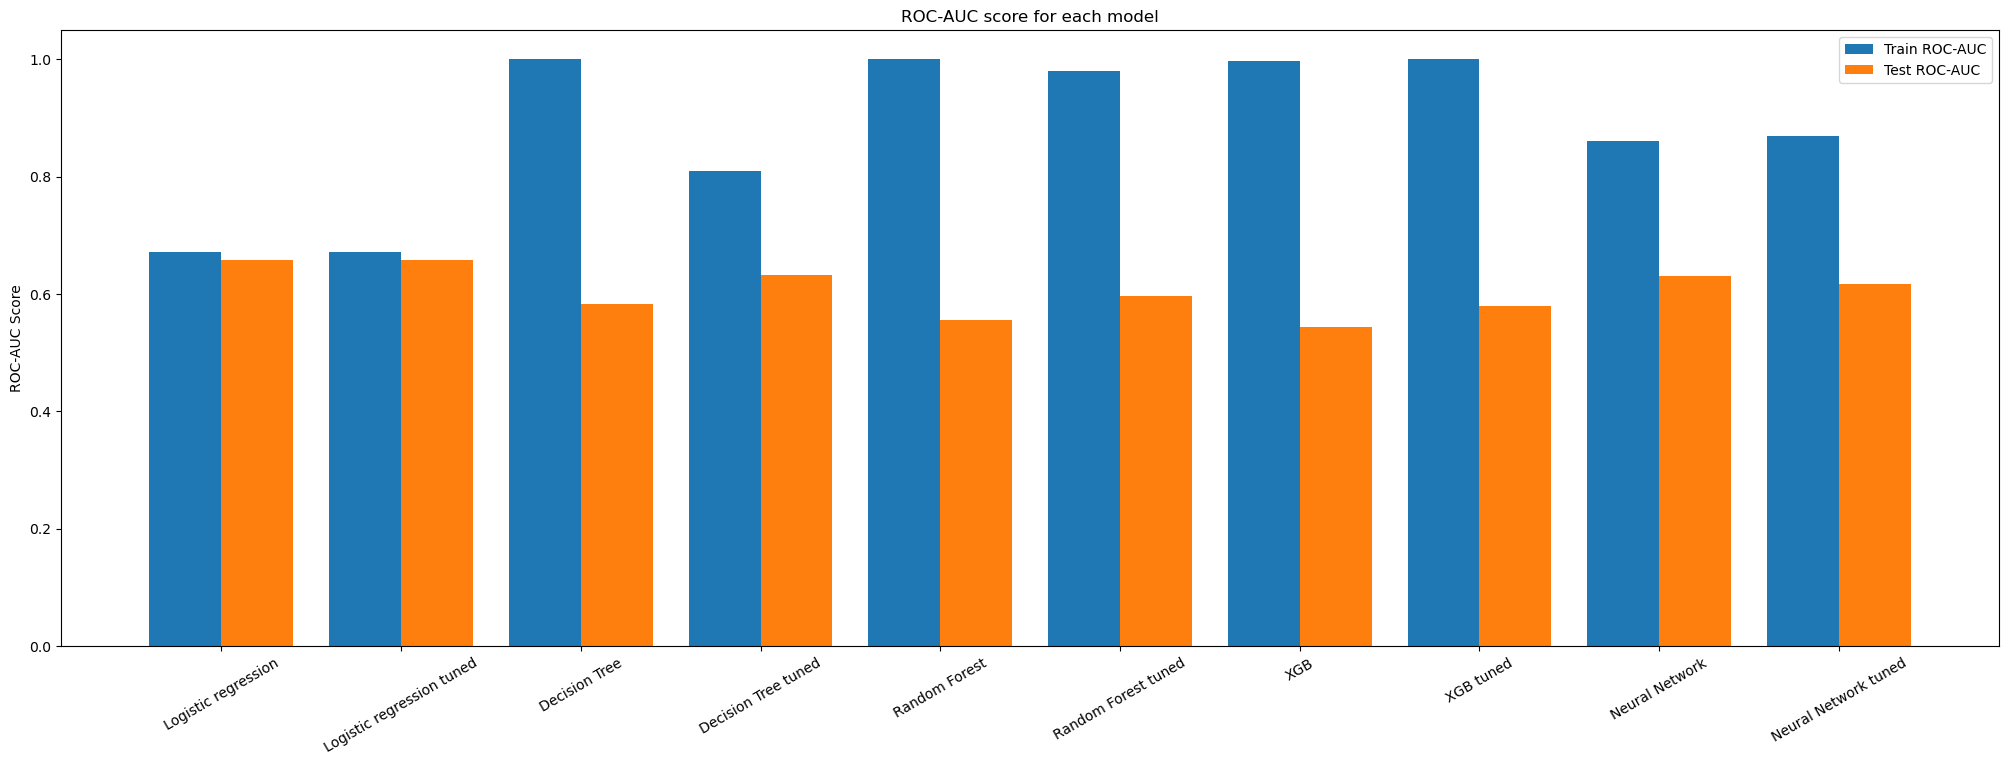

In [165]:
models = list(score.columns)
train = score.iloc[6,:]
test = score.iloc[7,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train ROC-AUC')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test ROC-AUC')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("ROC-AUC Score")
plt.title("ROC-AUC score for each model")
plt.legend()
plt.show()

### **F1 Score**

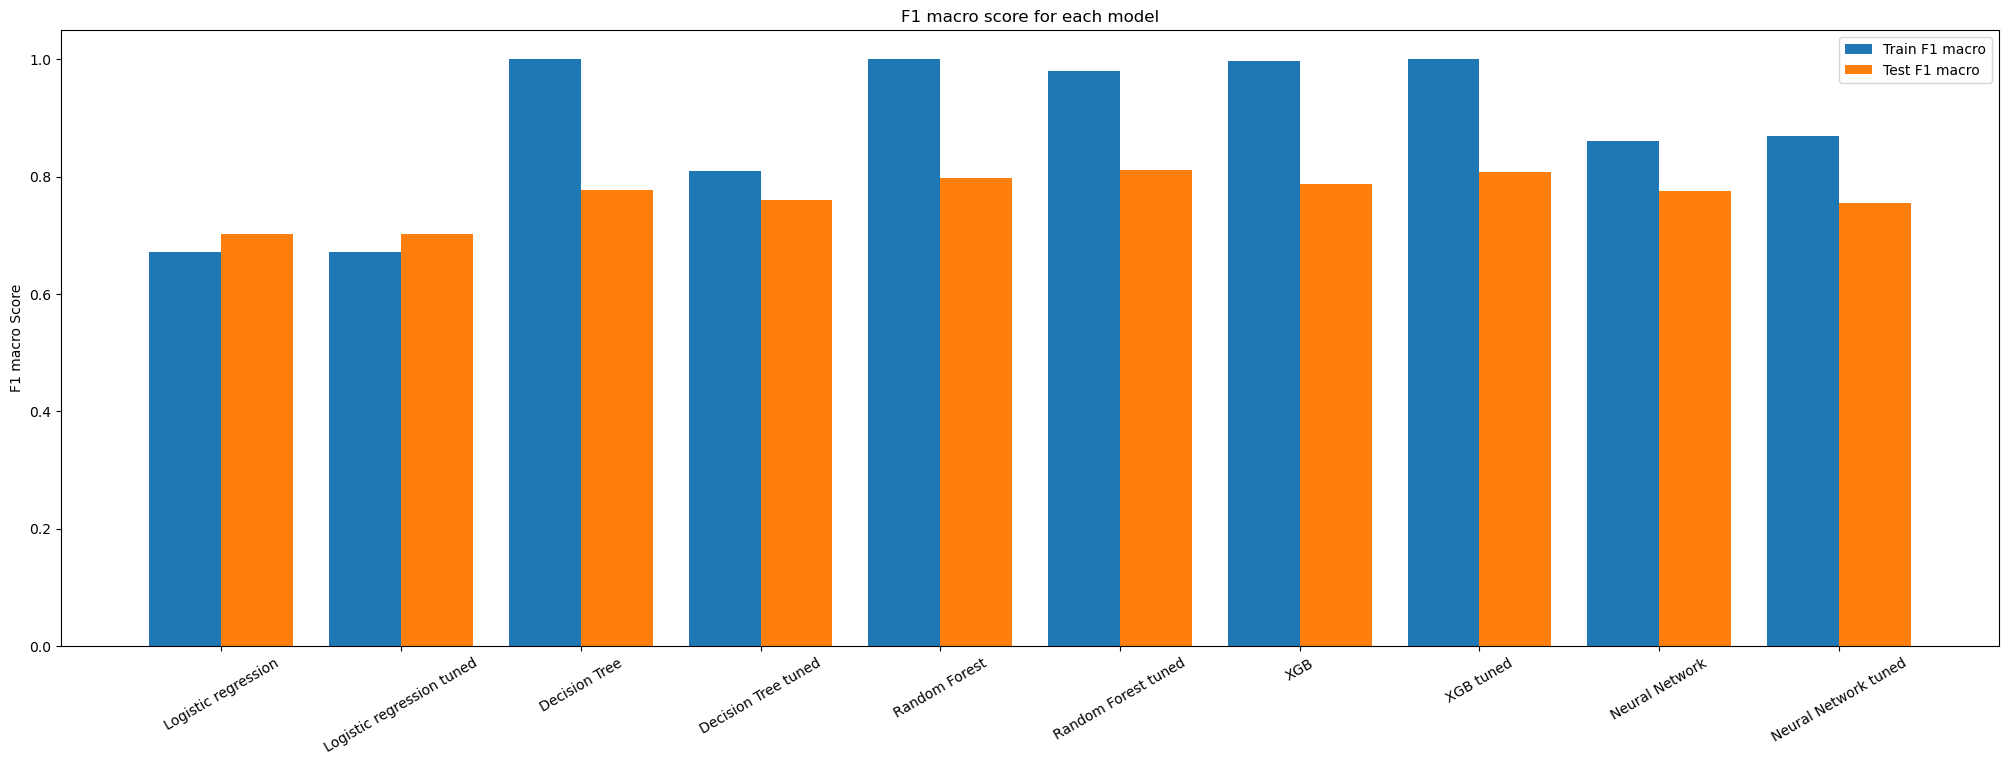

In [166]:
models = list(score.columns)
train = score.iloc[8,:]
test = score.iloc[9,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(25,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train F1 macro')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test F1 macro')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("F1 macro Score")
plt.title("F1 macro score for each model")
plt.legend()
plt.show()

## **Selection of best model**

In [167]:
# Removing the overfitted models which have accuracy,precision,recall, rocauc, f1 for train as : 1
score_t=score.transpose()
score_t.drop(['Decision Tree','Random Forest','XGB tuned'],axis=0,inplace=True)

In [168]:
# Removing 'Random Forest tuned' and 'XG boost' model because it also results in overfitting
score_t.drop(['Random Forest tuned','XGB'],axis=0,inplace=True)

In [169]:
score_t

Precision Train  Precision Test  Recall Train  \
Logistic regression               0.671298        0.816964      0.671173   
Logistic regression tuned         0.671727        0.816964      0.671609   
Decision Tree tuned               0.810294        0.803050      0.810292   
Neural Network                    0.861264        0.803239      0.861099   
Neural Network tuned              0.871055        0.796241      0.870039   

                           Recall Test  Accuracy Train  Accuracy Test  \
Logistic regression           0.653392        0.671173       0.653392   
Logistic regression tuned     0.653392        0.671609       0.653392   
Decision Tree tuned           0.733038        0.810292       0.733038   
Neural Network                0.756637        0.861099       0.756637   
Neural Network tuned          0.727139        0.870039       0.727139   

                           ROC-AUC Train  ROC-AUC Test  F1 macro Train  \
Logistic regression             0.671173      0.658854        0.671113   
Logistic regression tuned       0.671609      0.658854        0.671553   
Decision Tree tuned             0.810292      0.633119        0.810292   
Neural Network                  0.861099      0.630872        0.861083   
Neural Network tuned            0.870039      0.617545        0.869950   

                           F1 macro Test  
Logistic regression             0.702020  
Logistic regression tuned       0.702020  
Decision Tree tuned             0.760054  
Neural Network                  0.775863  
Neural Network tuned            0.754313

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

After carefully considering the potential consequences of false positives and false negatives in the context of our business objectives, I have selected **recall** as the primary evaluation metric for our CHD risk prediction model. This means that our goal is to maximize the number of true positives (patients correctly identified as having CHD risk) while minimizing the number of false negatives (patients incorrectly identified as not having CHD risk). By doing so, we aim to ensure that we correctly identify as many patients with CHD risk as possible, even if it means that we may have some false positives.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

After evaluating the performance of several machine learning models on the Framingham Heart Study dataset, I have selected the **Neural Network** as our final prediction model. This decision was based on the model’s performance on our primary evaluation metric of **recall**, which measures the ability of the model to correctly identify patients with CHD risk. In our analysis, we found that the Neural Network  had the highest recall score among the models we evaluated.

We chose recall as our primary evaluation metric because correctly identifying patients with CHD risk is critical to achieving our business objectives. By selecting a model with a high recall score, we aim to ensure that we correctly identify as many patients with CHD risk as possible, even if it means that we may have some false positives. Overall, we believe that the Neural Network is the best choice for our needs and will help us achieve a positive business impact.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

## **SHAP(Shapley additive Explanations)**

In [170]:
pip install shap

     -------------------------------------- 448.0/448.0 kB 5.6 MB/s eta 0:00:00
     --------------------------------------- 14.0/14.0 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.0
    Uninstalling numpy-1.24.0:
      Successfully uninstalled numpy-1.24.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.


In [171]:
# importing shap
import shap

In [172]:
# summarize the background dataset using k-means clustering
X_summary = shap.kmeans(X, 100)
neural.fit(X_smote,y_smote)
# create an explainer object
explainer = shap.KernelExplainer(neural.predict_proba, X_summary)

# compute the SHAP values for all the samples in the test data
shap_values = explainer.shap_values(X_test)

  0%|          | 0/678 [00:00<?, ?it/s]

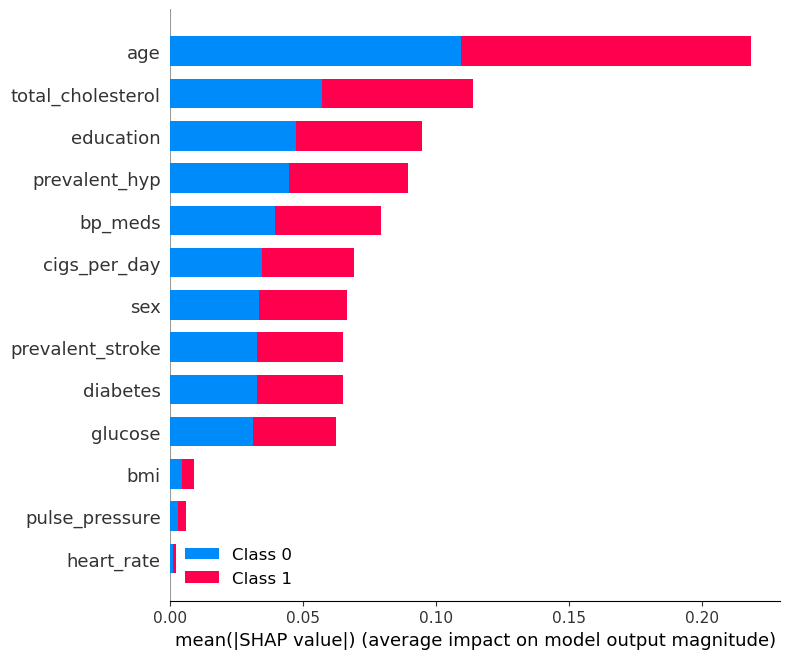

In [173]:
# Summery plot
shap.summary_plot(shap_values, X_test, feature_names=features)

This bar plot shows the important features and the mean shap values. It shows the average impact on the model output magnitude.

It does not show the positive or negative impact on the prediction.

# **Conclusion**

In conclusion, this project effectively utilized machine learning techniques to predict the risk of coronary heart disease (CHD) in patients over a 10-year period. The following key findings emerged:

1. Thorough data preprocessing and transformation greatly enhanced the performance of the machine learning models, resulting in more precise predictions.
2. The selection of relevant features played a critical role in identifying the most significant factors contributing to CHD risk.
3. The Neural Network model stood out as the optimal choice for prediction due to its exceptional recall score.
4. Various techniques, including SMOTE combined with Tomek links undersampling and standard scalar scaling, were employed to handle imbalanced data and improve the models' performance.
5. This project serves as a compelling example of how machine learning can be effectively applied to real-world scenarios, delivering tangible business benefits.


Ultimately, this project underscores the importance of meticulous data preparation and analysis in the realm of machine learning. By investing effort into data cleaning, feature selection, and model selection, accurate predictions can be achieved, empowering informed decision-making across diverse domains.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***